# Contradictory claims -- Co-occurrence Gold Std Corpus

Dan Sosa

Updated: 6/6/22

This notebook features analyses for extracting instances of sentence-level co-occurrence of context mentions and relation mentions. This will serve as a gold-ish standard corpus of true context-relation association (assumption: if context is mentioned in the same sentence as the relation, the context referred is modifying/associated with the relation).

Weaker, but we can also generate negatives under the assumption of other contexts mentioned in the paper, but not in the same sentence as the relation are not associated with specific relation in question. Need to think more maybe.

### Emulate the CLI

In [2]:
import click
import json
import pandas as pd

import os
from lit_contextizer.data_models.DataLoader import DataLoader

pmc_query_list_path = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/output/papers_to_extract_features_from.csv"
out_dir = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers"

dl = DataLoader()
print("Done initializing")

dl.all_pubmed_relations_df = pd.read_csv(os.path.join(out_dir, "all_pubmed_relations_df.csv")).astype({'pmid': 'string'})
dl.annot_id2entrez = json.load(open(f'{out_dir}/annot_id2entrez.csv'))
dl.annot_id2text = json.load(open(f'{out_dir}/annot_id2text.csv'))
dl.pmid2contexts = json.load(open(f'{out_dir}/pmid2contexts.csv'))
dl.contexts2pmid = json.load(open(f'{out_dir}/contexts2pmid.csv'))
dl.pmid2species = json.load(open(f'{out_dir}/pmid2species.csv'))

if pmc_query_list_path is not None:
    pmc_query_df = pd.read_csv(pmc_query_list_path)
    relation_subset = dl.all_pubmed_relations_df.merge(pmc_query_df, left_on="pmcid", right_on="PMCID", how="inner")
    features_df = dl.extract_features_from_all_pubmed_ppis(relation_subset, biocxml_dir=out_dir, biocxml_out_dir=out_dir)
    features_df.to_csv(os.path.join(out_dir, "insider_papers_features_df.csv"), index=False, sep='\t')
    
# TO DOS:
# 1. Check if the multiple context terms are being hit for each paper....
# 2. Make the positives and the negatives for context pairs from insider corpus
# 3. Think of downstream analyses....
# 4. Call urology and blah
# 5. Start preparing the Dengue pairs


Done initializing
opening /Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000021.bioc.xml
opening /Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000024.bioc.xml
opening /Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000025.bioc.xml
opening /Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000027.bioc.xml
opening /Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00001858.bioc.xml
opening /Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000032.bioc.xml
opening /Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000033.bioc.xml
opening /Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000035.bioc.xml
opening /Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000036.bioc.xml
opening /Users/dnsosa/Desktop/AltmanLab/bai/St

opening /Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00001850.bioc.xml
opening /Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00001874.bioc.xml
opening /Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00001885.bioc.xml
opening /Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00001925.bioc.xml
opening /Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00001929.bioc.xml
opening /Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00001935.bioc.xml
opening /Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00001945.bioc.xml
opening /Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00001951.bioc.xml
opening /Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00001953.bioc.xml
opening /Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/note

In [6]:
relation_subset

,rel,pmid,pmcid,entity1,entity2,entity1_text,entity2_text,filename,entity1_entrez,entity2_entrez,combined_entities_key,PMCID
0,Although <entity1>Ngn3</entity1> rapidly induc...,19289082,PMC2676438,T176046,T176042,Ngn3,insulin,pmc_00000021.bioc.xml,378938,378938,378938_378938,PMC2676438
1,It has been reported that <entity1>Btc</entity...,19289082,PMC2676438,T176586,T176575,Btc,Pax4,pmc_00000021.bioc.xml,10561,2178,10561_2178,PMC2676438
2,<entity1>Ngn3</entity1> induces <entity2>insul...,19289082,PMC2676438,T176611,T176610,Ngn3,insulin,pmc_00000021.bioc.xml,9475,57562,57562_9475,PMC2676438
3,<entity1>IGF-1</entity1> also decreases expres...,20071192,PMC2848911,T389336,T389333,IGF-1,lipoprotein lipase,pmc_00000024.bioc.xml,20821,2475,20821_2475,PMC2848911
4,<entity1>IGF-1</entity1> also decreases expres...,20071192,PMC2848911,T389336,T389333,IGF-1,lipoprotein lipase,pmc_00000024.bioc.xml,6737,2475,2475_6737,PMC2848911
...,...,...,...,...,...,...,...,...,...,...,...,...
3587,"On the other hand, <entity1>HIF-1α</entity1> u...",32476784,PMC7235208,T298542,T298537,HIF-1α,pla2g16,pmc_00001994.bioc.xml,3091,225845,225845_3091,PMC7235208
3588,13 <entity1>Fibroblast growth factor 10</entit...,28120575,PMC5290024,T353221,T353240,Fibroblast growth factor 10,MUC1,pmc_00002001.bioc.xml,2255,4582,2255_4582,PMC5290024
3589,13 <entity1>Fibroblast growth factor 10</entit...,28120575,PMC5290024,T353221,T353240,Fibroblast growth factor 10,MUC1,pmc_00002001.bioc.xml,25443,4582,25443_4582,PMC5290024
3590,"Furthermore, <entity1>TGFBIp</entity1> also in...",28120575,PMC5290024,T353360,T353369,TGFBIp,MUC1,pmc_00002001.bioc.xml,7045,4582,4582_7045,PMC5290024


### Initial pipeline for loading data and extracting papers

In [1]:
from os import path
import lit_contextizer as lc
import pandas as pd
from lit_contextizer.data_models.PaperUtilities import extract_features

print("Done loading pkg")

contra_df_path = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/output/extracted_features_all_papers_v2.csv"
ena_df_path = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/output/extracted_features_enrique_papers_v2.csv"


dl = lc.data_models.DataLoader.DataLoader()
print("Done initializing")
# NOTE! Make sure to parse_annotated first. Need to fix code to not overwrite
dl.parse_annotated_full_texts(cell_type_only=True) # tot: 21243
print("Done with full texts")
dl.parse_relationships_file()
print("Done with relationships")
all_annotators_df, annotated_connects = dl.parse_annotation_files_for_ena()

if not path.exists(contra_df_path):
    print("Need to extract features for Contradictions papers corpus") # Will take 1h20!
    #contra_df = extract_features(dl.paper_pile, no_cell_line=True) # NOTE We don't have MeSH headings for these yet....
    #contra_df.to_csv(contra_df_path)
    print("Finished extracting and saving extracted features for Contradictions papers corpus...")
else:
    print("Extracted features file found for Contradictions papers")
    contra_df = pd.read_csv(contra_df_path)
    print("Loaded.")
    
if not path.exists(ena_df_path):
    print("Need to extract features for ENA papers corpus")
    #ena_df = extract_features(dl.ena_paper_pile, annotated_connects=annotated_connects, do_calculate_pmi=False, do_calculate_in_mesh=True)
    #ena_df.to_csv(ena_df_path)
    print("Finished extracting and saving extracted features for Contradictions papers corpus...")
else:
    print("Extracted features file found for ENA papers")
    ena_df = pd.read_csv(ena_df_path)
    print("Loaded.")    

    

print(len(contra_df))
print(len(ena_df))
print(len(dl.paper_pile))


/Users/dnsosa/opt/miniconda3/envs/lit_con/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Done loading pkg
Done initializing
0 full texts read (of 21243)
No PMC for record 95
No PMC for record 111
No abstract for record PMC5509451
No title for record PMC4757870
No PMC for record 291
No abstract for record PMC5599977
No abstract for record PMC3953084
No title for record PMC6896798
No PMC for record 655
No abstract for record PMC6220479
No abstract for record PMC5482590
No abstract for record PMC4075648
No PMC for record 982
1000 full texts read (of 21243)
No text for record PMC2478564
No abstract for record PMC526782
No PMC for record 1419
No abstract for record PMC4694057
No PMC for record 1744
No PMC for record 1921
No title for record PMC6361748
No PMC for record 1984
No PMC for record 1993
No PMC for record 1993
2000 full texts read (of 21243)
No abstract for record PMC3784508
No PMC for record 2089
No abstract for record PMC7113201
No abstract for record PMC5374603
No abstract for record PMC3287601
No title for record PMC6803382
No abstract for record PMC4044980
No abst

/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/src/lit_contextizer/data_models/DataLoader.py:376: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Extracted features file found for Contradictions papers
Loaded.
Extracted features file found for ENA papers
Loaded.
1102208
30239
21209


In [55]:
dl.paper_pile['PMC5292560'].get_relations()[0]

### Example extracting contexts

In [192]:
import io
import json
import os
import re
from xml.sax import SAXParseException, make_parser  # noqa: S406

import bioc
import pandas as pd

from functools import reduce
from lit_contextizer.data_models.Extractable import Relation
from lit_contextizer.data_models.Paper import Paper
from lit_contextizer.data_models.Sentence import Sentence
from lit_contextizer.data_models.Utilities import create_contexts, fix_xml, generate_pairs_features_df,\
    load_all_groundings, two_common
from lit_contextizer.data_models.Xml2PseudoJson import Xml2PseudoJson
from lit_contextizer.data_models.PaperUtilities import extract_features, in2str


in_file = "../input/annotated_documents.json"
load_max = 0
cell_type_only = True

events = {}
paper_pile = {}
relationships = {}
ena_paper_pile = {}

with open(in_file) as doc_json_file:
    count = 0

    # For each file, create a new paper object
    for line in doc_json_file:
        record = json.loads(line)

        if count % 1000 == 0:
            print(f"{count} full texts read (of 21243)")

        # idk why sometimes there's no PMC ID
        if 'pmc' not in record.keys():
            print(f"No PMC for record {count}")
            continue

        if 'title' not in record['plain_text'].keys():
            print(f"No title for record {record['pmc']}")
            continue

        if 'abstract' not in record['plain_text'].keys():
            print(f"No abstract for record {record['pmc']}")
            continue

        if 'text' not in record['plain_text'].keys():
            print(f"No text for record {record['pmc']}")
            continue

        # TODO: Need to remove the PM at the beginning
        pmid = record['doc_id'].split("|")[0][2:]

        paper = Paper(title=record['plain_text']['title'],
                      abstract=record['plain_text']['abstract'],
                      full_text=record['plain_text']['text'],
                      pmcid=record['pmc'],
                      pmid=pmid,
                      doi=record['doi'],
                      journal=record['journal'])

        count += 1

        # Parse annotated full text or abstract, whatever's available. Make it a well-formatted XML with tags.
        if 'text' in record['annotated_text'].keys():
            in_str = f"<root>{record['annotated_text']['text']}</root>"
        elif 'abstract' in record['annotated_text'].keys():
            in_str = f"<root>{record['annotated_text']['abstract']}</root>"

        # Set up parser for handling XML
        parser = make_parser()  # noqa: S317
        handler = Xml2PseudoJson()
        parser.setContentHandler(handler)
        parsed_in_str = fix_xml(in_str)
        in_xml = io.StringIO(parsed_in_str)
        
        try:
            # Parse the XML -- resulting dictionary of events is now in handler.event_dict
            parser.parse(in_xml)

            # Create a Spacy document based on the text available (abstract or full text), no annots
            if 'text' in record['plain_text'].keys():
                plain_text = record['plain_text']['text']
            else:
                plain_text = record['plain_text']['abstract']

            if cell_type_only:
                just_ct_events = {}
                for event in handler.event_dict:
                    if handler.event_dict[event]["type"] in ["CellType", "CellLine", "Tissue"]:
                        just_ct_events[event] = handler.event_dict[event]
                create_contexts(paper, just_ct_events, plain_text)
            else:
                # Create context objects by cross-referencing document with extracted events dictionary
                create_contexts(paper, handler.event_dict, plain_text)

            # Store this event dictionary and paper
            events[record['pmc']] = handler.event_dict
            paper_pile[record['pmc']] = paper

        except SAXParseException as exc:
            # Likely from superfluous unescaped character. This is for debugging and creating regexes.
            print("Malformatted XML!")  # noqa: T001
            # width = 50
            # loc = 31683
            # print(in_str[loc - width:loc + width])
            # print(parsed_in_str[loc - width:loc + width])
            print(in_str)
            raise exc
            break
            
        if count > load_max:
            # Limit number of files loaded for debugging.
            break
        


0 full texts read (of 21243)


### Load full texts with annotations from Jake files

In [27]:
import os
import bioc
import re

import pandas as pd

from lit_contextizer.data_models.PaperUtilities import extract_features, in2str

##pubmed_annotated_texts_dir = f"/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers"
pubmed_annotated_texts_dir = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/with_citation_info"

in_dir = pubmed_annotated_texts_dir
load_max = 1

df_list = []  # list to become DF
total_paper_count = 0

annot_id2entrez = {}
annot_id2text = {}
pmid2contexts = {}
contexts2pmid = {}
pmid2species = {}
pmid2speciesText = {}

for in_file in sorted(os.listdir(in_dir)):
    if not in_file.startswith("pmc"):
        continue

    print(os.path.join(in_dir, in_file))

    with open(os.path.join(in_dir, in_file), 'rb') as f:

        #parser = bioc.BioCXMLDocumentReader(f)
        parser = bioc.biocxml.load(f)

        for doc in parser.documents:

            pmid = in2str(doc.infons["pmid"])
            pmcid = in2str(doc.infons["pmcid"])

            for sec in doc.passages:
                for annot in sec.annotations:
                    annot_type = annot.infons["type"]  # Chemical, Gene, xref, Species, Cell Context
                    if annot_type == "Gene":
                        annot_id2entrez[annot.id] = annot.infons["conceptid"]
                        annot_id2text[annot.id] = annot.text
                    elif annot_type == "CellContext":
                        context = in2str(annot.infons["normalized"]).lower()
                        if pmid not in pmid2contexts:
                            pmid2contexts[pmid] = set([context])
                        else:
                            pmid2contexts[pmid].add(context)

                        if context not in contexts2pmid:
                            contexts2pmid[context] = set([pmid])
                        else:
                            contexts2pmid[context].add(pmid)
                    elif annot_type == "Species":
                        species = in2str(annot.infons["conceptid"])
                        if pmid not in pmid2species:
                            pmid2species[pmid] = set([species])
                            pmid2speciesText[pmid] = set([annot.text])
                        else:
                            pmid2species[pmid].add(species)
                            pmid2speciesText[pmid].add(annot.text)

                if len(sec.relations) > 0:
                    ##print(sec.relations)
                    ##print("\n\n")
                    ##break
                    for rel in sec.relations:
                        sen = rel.infons["formatted_sentence"]
                        e1_refid = rel.nodes[0].refid
                        e2_refid = rel.nodes[1].refid

                        parsed_entities = re.findall(r'<entity[0-9]>(.+?)</entity[0-9]>', sen)
                        if len(parsed_entities) == 2:
                            row = {"rel": sen,
                                   "pmid": pmid,
                                   "pmcid": pmcid,
                                   "entity1": e1_refid,
                                   "entity2": e2_refid,
                                   "entity1_text": parsed_entities[0],
                                   "entity2_text": parsed_entities[1],
                                   "filename": in_file}
                        else:
                            print(f"TOO MANY ENTITIES PARSED IN SENTENCE: {sen}")
                            
                        if 'distance_to_nearest_sentence_with_citation' in rel.infons:
                            row["distance_to_nearest_sentence_with_citation"] = rel.infons['distance_to_nearest_sentence_with_citation']

                        df_list.append(row)

        total_paper_count += 1
        if total_paper_count == load_max:
            break

    if total_paper_count == load_max:
        break

all_pubmed_relations_df = pd.DataFrame(df_list)
all_pubmed_relations_df["entity1_entrez"] = all_pubmed_relations_df["entity1"].map(annot_id2entrez)
all_pubmed_relations_df["entity1_entrez"] = all_pubmed_relations_df["entity1_entrez"].apply(lambda x: x.split(';'))
all_pubmed_relations_df = all_pubmed_relations_df.explode("entity1_entrez").reset_index(drop=True)

all_pubmed_relations_df["entity2_entrez"] = all_pubmed_relations_df["entity2"].map(annot_id2entrez)
all_pubmed_relations_df["entity2_entrez"] = all_pubmed_relations_df["entity2_entrez"].apply(lambda x: x.split(';'))
all_pubmed_relations_df = all_pubmed_relations_df.explode("entity2_entrez").reset_index(drop=True)

def make_keys(x):
    sorted_entrez = sorted([x['entity1_entrez'], x['entity2_entrez']])  # Alphabetically NOT numerically sorted
    return '_'.join(sorted_entrez)

all_pubmed_relations_df['combined_entities_key'] = all_pubmed_relations_df.apply(make_keys, axis=1)



/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/with_citation_info/pmc_00000000.citations.bioc.xml


In [28]:
all_pubmed_relations_df

,rel,pmid,pmcid,entity1,entity2,entity1_text,entity2_text,filename,distance_to_nearest_sentence_with_citation,entity1_entrez,entity2_entrez,combined_entities_key
0,"Indeed, both <entity1>TGF-β1</entity1> and TGF...",17251317,PMC1892798,T21684,T21681,TGF-β1,tenascin,pmc_00000000.citations.bioc.xml,0,7040,3371,3371_7040
1,"Treatment with anti-IL5 antibody, that reduced...",17251317,PMC1892798,T21749,T21746,TGF-β,IL-5,pmc_00000000.citations.bioc.xml,0,3567,21803,21803_3567
2,"Treatment with anti-IL5 antibody, that reduced...",17251317,PMC1892798,T21749,T21746,TGF-β,IL-5,pmc_00000000.citations.bioc.xml,0,3567,7040,3567_7040
3,<entity1>Interleukin-7</entity1> (IL-7) that i...,16034364,PMC1351344,T27404,T27410,Interleukin-7,OX40,pmc_00000000.citations.bioc.xml,NA,16196,22163,16196_22163
4,These studies are in agreement with the presen...,17276402,PMC1828119,T28647,T28646,VEGF,AMPK,pmc_00000000.citations.bioc.xml,1,281572,5562,281572_5562
...,...,...,...,...,...,...,...,...,...,...,...,...
103,The anion channel affected in cystic fibrosis ...,15561411,PMC1890044,T120628,T120629,CFTR,cAMP,pmc_00000000.citations.bioc.xml,0,316010,12638,12638_316010
104,The anion channel affected in cystic fibrosis ...,15561411,PMC1890044,T120628,T120629,CFTR,cAMP,pmc_00000000.citations.bioc.xml,0,316010,24255,24255_316010
105,Although it is likely that <entity1>leptin</en...,17618127,PMC1995039,T121501,T121513,leptin,MAPK,pmc_00000000.citations.bioc.xml,0,16846,5594,16846_5594
106,Although it is likely that <entity1>leptin</en...,17618127,PMC1995039,T121501,T121513,leptin,MAPK,pmc_00000000.citations.bioc.xml,0,25608,5594,25608_5594


In [237]:
'distance_to_nearest_sentence_with_citation' in dir(rel)

True

In [194]:
record.keys()

dict_keys(['doc_id', 'doi', 'pmc', 'journal', 'plain_text', 'annotated_text', 'dep_graph'])

In [25]:
[k for k in handler.event_dict if handler.event_dict[k]['type'] == "Disease"]

['infections',
 'autoimmune disease',
 'autoimmune',
 "crohn's disease",
 'rheumatoid arthritis',
 'psoriasis',
 'autoimmune diseases',
 'arthritis',
 'autoinflammatory diseases',
 'inflammatory disease',
 'autoimmune lymphoproliferative syndrome',
 'alps',
 'lymphoproliferative disease',
 'multiple sclerosis',
 'autoimmunity',
 'infection',
 'clostridium difficile',
 'inflammatory',
 'type 1 diabetes',
 'gout',
 'silicosis',
 'cryopyrin associated periodic syndromes',
 'caps',
 'rupture',
 'yersinia infection',
 'caspase‐8 deficiency',
 'salmonella infection',
 'tnf receptor‐associated periodic syndrome',
 'traps',
 'hereditary recurrent fever',
 'inflammation',
 'inflammatory bowel disease',
 'x‐linked lymphoproliferative disease 2',
 'xlp2',
 'hemophagocytic lymphohistiocytosis',
 'hlh',
 'autoinflammatory syndrome',
 'listeria infection',
 'immunodeficiency',
 'amylopectinosis',
 'autoinflammatory disease',
 'dermatitis',
 'splenomegaly',
 'tuberculosis',
 'leukocytosis',
 'skin le

In [58]:
for ctx in paper_pile['PMC5292560'].get_context_list():
    print(ctx.get_text())

NameError: name 'paper_pile' is not defined

### Example extracting relations

In [29]:
in_file = "../input/opensource_gene_gene_sign_contradictions_svo_w_license_strict_w_entity_locations.csv"
load_max = 0

# Load file of relations
svo_contra_df = pd.read_csv(in_file, index_col=[0])

# Iterate over relations and associate them with the proper paper object
count = 0
for _index, row in svo_contra_df.iterrows():
    pmcid = f"PMC{row['pmcid']}"
    pmid = f"PM{row['pmid']}"
    relation = Relation(main_verb=row['predicate'],
                        entity1=row["entity1_standardised"],
                        entity2=row["entity2_standardised"],
                        text=row['text'],
                        paper_doi=row['doi'],
                        paper_pmcid=pmcid,
                        paper_pmid=pmid,
                        start_idx=row['entity1_begin_index'],
                        end_idx=row['entity2_end_index'],
                        sent_idx=row['sentence_index'],
                        sentence=Sentence(row['text']))  # NOTE This index might not agree with our indices

    # If we've found a new paper, create a new object. Presumably this doesn't happen since the set of
    # papers in the annotated set is larger? Might not be the case because of PMC vs Elsevier etc.
    if relation.get_paper_pmcid() not in paper_pile:
        paper = Paper(title=row['doc_title_string'],
                      abstract=None,
                      full_text=None,
                      doi=row['doi'],
                      pmcid=pmcid,
                      pmid=pmid,
                      journal=row['journal_string'])
        paper_pile[pmcid] = paper

    paper_pile[pmcid].add_relation(relation)

    # Add the relation to the relation list. Again this feature might be redundant.
    if pmcid in relationships:
        relationships[pmcid].append(relation)
    else:
        relationships[pmcid] = [relation]

    count += 1
    
    if count > load_max:
        break



In [30]:
relationships

{'PMC3384610': [<lit_contextizer.data_models.Extractable.Relation at 0x7fc19bc3be50>]}

In [35]:
paper_pile['PMC3384610'].get_relations()[0].get_text()

'Our results show that inhibition of the DNA damage sensors ATM/ATR with caffeine prevents the increased expression of p53 and p21 caused by extract treatment ( Figure 4A ).'

### Extracting con and rels from ENA now 

In [1]:
conservative_join = False

paper_ids = ["PMC2156142", "PMC3032653", "PMC3135394", "PMC3198449", "PMC3233644", "PMC3461631", "PMC4052680",
             "PMC4250046", "PMC4746590", "PMC534114"]
paper_dfs = []
annotated_connects = set()
onto2texts, text2ontos = load_all_groundings()

for paper_id in paper_ids:

    paper_event_dict = {}
    ena_full_text_file = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/{paper_id}.txt"

    # Open the full text
    with open(ena_full_text_file, 'r') as f:
        pmc_txt = f.read()

    # Create the paper
    paper = Paper(title=paper_id,
                  abstract=None,
                  full_text=re.sub('\n\n', '. ', pmc_txt),
                  doi=paper_id,
                  pmcid=paper_id,
                  pmid=None,  # DO NOT HAVE PMID FOR THESE
                  journal=None)

    annotator_events_dfs = []

    # Open the sentences
    sentences = []
    ena_sentences = f"../input/ENA_validation_data/sentences/{paper_id}_sentences.txt"
    with open(ena_sentences, 'r') as sentences_file:
        for line in sentences_file:
            sentences.append(line)
    paper_plain_text = '  '.join([sent.rstrip() for sent in sentences])

    for i in range(1, 4):
        # And let's check out the events
        ena_events_file = f"../input/ENA_validation_data/BioContext_corpus/corpus_data/annotator{i}/{paper_id}_events.tsv"
        colnames = ['event_sent_idx', 'event_span_idx', 'assoc_context_terms']
        events = pd.read_csv(ena_events_file, names=colnames, header=None, sep='\t')
        annotator_events_dfs.append(events)

    # Dropping NA because some events have no annotated context associated.
    # Conservative join means all annotators had to annotated the same relation event. Not conservative means
    # the union of individual annotators' events.
    # TODO: Check if there's a different file I should be looking at...?
    if conservative_join:
        df = reduce(lambda x, y: pd.merge(x.dropna(), y.dropna(), on='event_sent_idx', how='inner'), annotator_events_dfs)[
            ["event_sent_idx", "assoc_context_terms_x", "assoc_context_terms_y", "assoc_context_terms"]]
    else:
        df = reduce(lambda x, y: pd.merge(x.dropna(), y.dropna(), on='event_sent_idx', how='outer'), annotator_events_dfs)[
            ["event_sent_idx", "assoc_context_terms_x", "assoc_context_terms_y", "assoc_context_terms"]]
    df = df.assign(annot1_ctx_terms=df['assoc_context_terms_x'].str.split(',')).explode('annot1_ctx_terms')[:]
    df = df.reset_index().reindex(df.columns, axis=1)
    df = df.assign(annot2_ctx_terms=df['assoc_context_terms_y'].str.split(',')).explode('annot2_ctx_terms')[:]
    df = df.reset_index().reindex(df.columns, axis=1)
    df = df.assign(annot3_ctx_terms=df['assoc_context_terms'].str.split(',')).explode('annot3_ctx_terms')[:]
    df["two_agree"] = df.apply(
        lambda row: two_common(row.annot1_ctx_terms, row.annot2_ctx_terms, row.annot3_ctx_terms), 1)
    # df = df[["event_sent_idx", "annot1_ctx_terms", "annot2_ctx_terms", "annot3_ctx_terms",
    #          "two_agree"]].dropna().groupby(["event_sent_idx", "two_agree"]).apply(pd.DataFrame.sample, n=1)
    df["paper_id"] = paper_id
    paper_dfs.append(df)

    # Create the relation objects
    sent_idxs = list(set(df["event_sent_idx"]))
    sent_idxs.sort()
    for sent_idx in sent_idxs:
        relation = Relation(main_verb=None,
                            entity1=None,
                            entity2=None,
                            text=sentences[sent_idx].rstrip(),
                            paper_pmcid=paper_id,  # TODO: fix these all being the same!
                            paper_pmid=paper_id,
                            paper_doi=paper_id,
                            start_idx=None,
                            end_idx=None,
                            sent_idx=sent_idx,
                            sentence=Sentence(sentences[sent_idx]))

        paper.add_relation(relation)

    # Create the context objects
    annot_1_terms = set(df['annot1_ctx_terms'])
    annot_2_terms = set(df['annot2_ctx_terms'])
    annot_3_terms = set(df['annot3_ctx_terms'])
    unique_annot_terms = list(annot_1_terms.union(annot_2_terms, annot_3_terms))
    for annot_term in unique_annot_terms:
        generic_filler_attributes = {"type": None, "pos": -9999}

        if annot_term not in onto2texts:
            # for example, annotated manual:HCE, but grounding is manual:HCE-cells. Accepting the loss here.
            continue
        texts = onto2texts[annot_term]
        for text in texts:
            paper_event_dict[text.lower()] = generic_filler_attributes
            annotated_connects.add((paper_id, sentences[sent_idx].rstrip(), text.lower()))

    # Create a context list based on the events at the intersection
    create_contexts(paper, paper_event_dict, paper_plain_text)
    ena_paper_pile[paper_id] = paper

# Combine the DFs across papers
all_annotators_df = pd.concat(paper_dfs)


NameError: name 'load_all_groundings' is not defined

In [50]:
annotated_connects

{('PMC2156142',
  'Shetty et al. 1998 showed that overexpression of Drab6 Q71L in a subset of cells within the eye led to degeneration after two weeks .',
  'animal'),
 ('PMC2156142',
  'Shetty et al. 1998 showed that overexpression of Drab6 Q71L in a subset of cells within the eye led to degeneration after two weeks .',
  'cell membrane'),
 ('PMC2156142',
  'Shetty et al. 1998 showed that overexpression of Drab6 Q71L in a subset of cells within the eye led to degeneration after two weeks .',
  'cell surface'),
 ('PMC2156142',
  'Shetty et al. 1998 showed that overexpression of Drab6 Q71L in a subset of cells within the eye led to degeneration after two weeks .',
  'cytosol'),
 ('PMC2156142',
  'Shetty et al. 1998 showed that overexpression of Drab6 Q71L in a subset of cells within the eye led to degeneration after two weeks .',
  'drosophila'),
 ('PMC2156142',
  'Shetty et al. 1998 showed that overexpression of Drab6 Q71L in a subset of cells within the eye led to degeneration after t

In [45]:
for ctx in ena_paper_pile['PMC2156142'].get_context_list():
    print(ctx.get_text())

drosophila
yeast
drosophila
scutellum
vesicles
vesicles
vesicles
membranes
membranes
vesicle
drosophila
drosophila
cell surface
drosophila
organism
yeast
mice
eukaryotic cells
drosophila
drosophila
eye
eye
eye
plasma membrane
membrane
mouse
drosophila
drosophila
yeast
drosophila
thorax
precursor cells
drosophila
yeast
cell surface
plasma membrane
membrane
cell surface
cell surface
drosophila
drosophila
drosophila
yeast
yeast
cell membrane
membrane
cell surface
organism
eye
eye
eye
scutellum
drosophila


In [46]:
annotated_connects  # check that 

{('PMC2156142',
  'Shetty et al. 1998 showed that overexpression of Drab6 Q71L in a subset of cells within the eye led to degeneration after two weeks .',
  'animal'),
 ('PMC2156142',
  'Shetty et al. 1998 showed that overexpression of Drab6 Q71L in a subset of cells within the eye led to degeneration after two weeks .',
  'cell membrane'),
 ('PMC2156142',
  'Shetty et al. 1998 showed that overexpression of Drab6 Q71L in a subset of cells within the eye led to degeneration after two weeks .',
  'cell surface'),
 ('PMC2156142',
  'Shetty et al. 1998 showed that overexpression of Drab6 Q71L in a subset of cells within the eye led to degeneration after two weeks .',
  'cytosol'),
 ('PMC2156142',
  'Shetty et al. 1998 showed that overexpression of Drab6 Q71L in a subset of cells within the eye led to degeneration after two weeks .',
  'drosophila'),
 ('PMC2156142',
  'Shetty et al. 1998 showed that overexpression of Drab6 Q71L in a subset of cells within the eye led to degeneration after t

### Now extract features

In [3]:
from os import path
import lit_contextizer as lc
import pandas as pd
from lit_contextizer.data_models.PaperUtilities import extract_features


dl = lc.data_models.DataLoader.DataLoader()
print("Done initializing")
all_annotators_df, annotated_connects = dl.parse_annotation_files_for_ena()
ena_df = extract_features(dl.ena_paper_pile, annotated_connects=annotated_connects, do_calculate_pmi=False, do_calculate_in_mesh=False, is_enrique=True)


Done initializing


/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/src/lit_contextizer/data_models/DataLoader.py:367: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Index(['paper_id', 'rel', 'con', 'con_sent', 'con_type', 'ent_1', 'ent_2',
       'sent_dist', 'sec_dist', 'rel_sec', 'norm_rel_sec', 'con_sec',
       'norm_con_sec', 'num_con_mentions', 'is_con_fp', 'annotation'],
      dtype='object')


In [9]:
from collections import Counter
Counter(ena_df[ena_df.sent_dist == 0].annotation)

ena_df[ena_df.sent_dist == 0][ena_df.annotation]

<ipython-input-9-c5f93d89fb2c>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ena_df[ena_df.sent_dist == 0][ena_df.annotation]


,paper_id,rel,con,con_sent,con_type,ent_1,ent_2,sent_dist,sec_dist,rel_sec,norm_rel_sec,con_sec,norm_con_sec,num_con_mentions,is_con_fp,annotation,min_sent_dist,is_closest_cont_by_sent
2274,PMC2156142,Shetty et al. 1998 showed that overexpression of Drab6 Q71L in a subset of cells within the eye led to degeneration after two weeks .,eye,showed that overexpression of Drab6 Q71L in a subset of cells within the eye led to degeneration after two weeks.,None,None,None,0.0,0.0,discussion,discussion and conclusion,discussion,discussion and conclusion,6,False,True,0.0,True
7922,PMC3135394,"Echoing this notion , at least in Drosophila , oxidants play an essential role in the normal differentiation of HSCs into mature progeny ( XREF_BIBR ) .",drosophila,"Echoing this notion, at least in Drosophila , oxidants play an essential role in the normal differentiation of HSCs into mature progeny ..",None,None,None,0.0,0.0,introduction,background,introduction,background,1,False,True,0.0,True
9528,PMC3233644,"Here , we reveal a kinase independent function of CRAF in cell proliferation and demonstrate that phospho-S338 CRAF localizes to centrosomes and mitotic spindle poles in G2/M , where it interacts with Aurora-A and Plk1 , promotes Plk1 activation and thereby mitotic and tumor progression ( XREF_SUPPLEMENTARY ) .",spindle poles,"Here, we reveal a kinase independent function of CRAF in cell proliferation and demonstrate that phospho-S338 CRAF localizes to centrosomes/mitotic spindle poles in G2/M, where it interacts with Aurora-A and Plk1, promotes Plk1 activation and thereby mitotic and tumor progression .",None,None,None,0.0,0.0,None,None,None,None,5,True,True,0.0,True
21254,PMC3461631,It is plausible that the antitumorigenic functions of plexin-B1 observed in melanoma are adopted in gliomas as well .,melanoma,It is plausible that the antitumorigenic functions of plexin-B1 observed in melanoma are adopted in gliomas as well..,None,None,None,0.0,0.0,introduction,background,introduction,background,6,False,True,0.0,True
26504,PMC4250046,"Our study demonstrates that expression of cyclin D1 is associated with lymph node metastasis and the clinical stage of ESCC , but p21 nuclear staining has no significant correlation with the survival .",lymph node,"Our study demonstrates that expression of cyclin D1 is associated with lymph node metastasis and the clinical stage of ESCC, but p21 nuclear staining has no significant correlation with the survival.",None,None,None,0.0,0.0,discussion,discussion and conclusion,discussion,discussion and conclusion,6,True,True,0.0,True
28309,PMC4746590,"Viral tropism depends mostly on the host factor 's membrane receptor composition , as they are hijacked by the virus to function as entry gates into the cell for the virus ( e.g. , the high specificity with which HIV infects CD4+ T cells is due to the specific interaction between the viral envelope protein gp120 and the surface-glycoprotein CD4 during viral entry XREF_BIBR ) .",membrane,"Viral tropism depends mostly on the host factor’s membrane receptor composition, as they are hijacked by the virus to function as entry gates into the cell for the virus (e.g., the high specificity with which HIV infects CD4 + T cells is due to the specific interaction between the viral envelope protein gp120 and the surface-glycoprotein CD4 during viral entry ).",None,None,None,0.0,0.0,discussion,discussion and conclusion,discussion,discussion and conclusion,3,False,True,0.0,True
28310,PMC4746590,"Viral tropism depends mostly on the host factor 's membrane receptor composition , as they are hijacked by the virus to function as entry gates into the cell for the virus ( e.g. , the high specificity with which HIV infects CD4+ T cells is due to the specific interaction between the viral envelope protein gp120 and the surface-glycoprotein CD4 during viral entry XREF_BIBR ) .",hiv,"Viral tropism depends mostly on the host factor’s membrane receptor composition, as they are hijacked by the vir

In [10]:
set(ena_df[ena_df.paper_id == 'PMC2156142'].con)

{'cell membrane',
 'cell surface',
 'drosophila',
 'eukaryotic cells',
 'eye',
 'membrane',
 'membranes',
 'mice',
 'mouse',
 'organism',
 'plasma membrane',
 'precursor cells',
 'scutellum',
 'thorax',
 'vesicle',
 'vesicles',
 'yeast'}

In [82]:
# import bioc

from bioc import biocxml

##local_biocxml_dir = "/Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/PM_files"
local_biocxml_dir = "/Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts"
biocxmls_pmc_dir = local_biocxml_dir

biocxml_file = os.path.join(biocxmls_pmc_dir, f"{paper.get_pmcid()}.biocxml")

if path.exists(biocxml_file):
    full_text_in_sections = []
    sec_mapper = {}
    with open(biocxml_file, 'rb') as f:
        #parser = bioc.BioCXMLDocumentReader(f)
        collection = bioc.biocxml.load(f)
        document = collection.documents[0]
        
        for sec_idx, sec in enumerate(document.passages):
            full_text_in_sections.append(sec.text)
            sec_type = sec.infons['subsection']
            sent_list = [s + "." for s in sec.text.split(". ") if s]
            for sent in sent_list:
                sec_mapper[sent] = (sec_idx, sec_type)
else:
    # Don't even consider papers without that biocxml file
    pass


In [73]:
with open(biocxml_file, 'rb') as f:
    #parser = bioc.BioCXMLDocumentReader(f)
    #document = biocxml.__next__()
    collection = biocxml.load(f)

In [81]:
collection.documents[0].passages

[BioCPassage[offset=0,text='The docking prote ...  survival pathway',infons=[section=title,subsection=None],sentences=[],annotations=[],relations=[],],
 BioCPassage[offset=116,text='Background',infons=[section=abstract,subsection=background],sentences=[],annotations=[],relations=[],],
 BioCPassage[offset=126,text='Gab1 is a docking ... direct mechanism.',infons=[section=abstract,subsection=background],sentences=[],annotations=[],relations=[],],
 BioCPassage[offset=537,text='Results',infons=[section=abstract,subsection=results],sentences=[],annotations=[],relations=[],],
 BioCPassage[offset=544,text='We used fibroblas ...  in Gab1-/- MEFs.',infons=[section=abstract,subsection=results],sentences=[],annotations=[],relations=[],],
 BioCPassage[offset=1298,text='Conclusions',infons=[section=abstract,subsection=conclusions],sentences=[],annotations=[],relations=[],],
 BioCPassage[offset=1309,text='The primary mecha ... dependent manner.',infons=[section=abstract,subsection=conclusions],sente

In [19]:
contra_df_path = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/output/extracted_features_all_papers_v2.csv"
contra_df = pd.read_csv(contra_df_path, index_col=0).drop_duplicates()


In [29]:
contra_df[contra_df.sent_dist == 0].head(10)

,paper_id,rel,con,con_sent,con_type,ent_1,ent_2,sent_dist,sec_dist,rel_sec,...,con_sec,norm_con_sec,num_con_mentions,is_con_fp,pmi_1,num_sec_cooccur_ent_1,pmi_2,num_sec_cooccur_ent_2,min_sent_dist,is_closest_cont_by_sent
618,PMC3123339,"Besides, the result that activation of ERK and PI3K-AKT pathways significantly increased the level of MMP-9 in Chang liver cells (See Figure S1B ) suggests that AKT and ERK pathways-dependent MMP-9 expression may also exist in Chang liver cells and not be specific to tumor cells.",liver,"Besides, the result that activation of ERK and PI3K-AKT pathways significantly increased the level of MMP-9 in Chang liver cells (See Figure S1B ) suggests that AKT and ERK pathways-dependent MMP-9 expression may also exist in Chang liver cells and not be specific to tumor cells.",Tissue,AKT1,MMP9,0.0,0.0,discussion,...,discussion,discussion and conclusion,14,False,-inf,0,-inf,0,0.0,True
838,PMC5368651,"Similar to its role in endochondral bone formation, Phd2 inhibits HIF-1α signaling and hence inhibits chondrocyte differentiation 13 14 .",chondrocyte,"Similar to its role in endochondral bone formation, Phd2 inhibits HIF-1α signaling and hence inhibits chondrocyte differentiation 13 14 .",CellType,EGLN1,HIF1A,0.0,0.0,discussion,...,discussion,discussion and conclusion,28,False,-inf,0,-inf,0,0.0,True
1721,PMC6566566,Leptin acts with several mechanisms on T lymphocytes and induces the expression of the long isoform of LEPR in CD4 + T cells [ 93 ].,t,Leptin acts with several mechanisms on T lymphocytes and induces the expression of the long isoform of LEPR in CD4 + T cells [ 93 ].,CellType,LEP,LEPR,0.0,0.0,introduction,...,introduction,background,11,False,-5.906891,4,-5.906891,4,0.0,True
1788,PMC3548630,"TGF β causes induction of connective tissue growth factor (CTGF), which further mediates stimulatory actions of TGF β on ECM synthesis ( 15 ).",connective tissue,"TGF β causes induction of connective tissue growth factor (CTGF), which further mediates stimulatory actions of TGF β on ECM synthesis ( 15 ).",Tissue,?,CCN2,0.0,0.0,introduction,...,introduction,background,2,False,-inf,0,-inf,0,0.0,True
2769,PMC6803444,Intralesional IL-2 (NCT03474497) increases PD-L1 expression and promotes CD8 + T cell infiltration ( 114 ).,t cell,Intralesional IL-2 (NCT03474497) increases PD-L1 expression and promotes CD8 + T cell infiltration ( 114 ).,CellType,IL2,CD8A,0.0,0.0,introduction,...,introduction,background,23,False,-inf,0,-inf,0,0.0,True
2990,PMC6008380,We recently found that SP-D inhibits replication of seasonal IAV in human monocytes and reduces monocyte tumor necrosis factor (TNF) responses to the virus ( 56 ).,monocyte,We recently found that SP-D inhibits replication of seasonal IAV in human monocytes and reduces monocyte tumor necrosis factor (TNF) responses to the virus ( 56 ).,CellType,SFTPD,TNF,0.0,0.0,introduction,...,introduction,background,1,True,-inf,0,-inf,1,0.0,True
3153,PMC4527226,"IL-4 has been shown to inhibit secretion of IL-1β, TNF, and IL-6 from monocytes [ 45 ], and when secreted following muscle damage, to inhibit differentiation of adipocyte progenitor cells [ 12 ]; thus, the beneficial effect of IL-4 on A/J myoblast differentiation may be mediated by its anti-inflammatory and pro-myogenic activities.",adipocyte,"IL-4 has been shown to inhibit secretion of IL-1β, TNF, and IL-6 from monocytes [ 45 ], and when secreted following muscle damage, to inhibit differentiation of adipocyte progenitor cells [ 12 ]; thus, the beneficial effect of IL-4 on A/J myoblast differentiation may be mediated by its anti-inflammatory and pro-myogenic activities.",CellType,IL4,IL6,0.0,0.0,discussion,...,discussion,discussion and conclusion,1,False,-inf,0,-inf,0,0.0,True
3154,PMC4527226,"IL-4 has been shown to inhibit secretion of IL-1β, TNF, and IL-6 from monocytes [ 45 ], and when secreted following muscle damage, to inhibit differentiation of adipocyte progenitor cells [ 12 ]; thus, the beneficial effect of IL-4 on A/J m

In [53]:
contra_df

NameError: name 'contra_df' is not defined

In [28]:
#set(contra_df[contra_df.paper_id == "PMC6803444"].con)
set(contra_df[contra_df.paper_id == "PMC6803444"][contra_df.con_type == "CellType"].con)

<ipython-input-28-041316081f8b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  set(contra_df[contra_df.paper_id == "PMC6803444"][contra_df.con_type == "CellType"].con)


{'nk cell', 't cell', 't-cell', 'treg'}

In [23]:
contra_df[contra_df.sent_dist == 0][contra_df.paper_id == "PMC5368651"].drop_duplicates()

<ipython-input-23-2428fec0aed0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  contra_df[contra_df.sent_dist == 0][contra_df.paper_id == "PMC5368651"].drop_duplicates()


,paper_id,rel,con,con_sent,con_type,ent_1,ent_2,sent_dist,sec_dist,rel_sec,...,con_sec,norm_con_sec,num_con_mentions,is_con_fp,pmi_1,num_sec_cooccur_ent_1,pmi_2,num_sec_cooccur_ent_2,min_sent_dist,is_closest_cont_by_sent
838,PMC5368651,"Similar to its role in endochondral bone formation, Phd2 inhibits HIF-1α signaling and hence inhibits chondrocyte differentiation 13 14 .",chondrocyte,"Similar to its role in endochondral bone formation, Phd2 inhibits HIF-1α signaling and hence inhibits chondrocyte differentiation 13 14 .",CellType,EGLN1,HIF1A,0.0,0.0,discussion,...,discussion,discussion and conclusion,28,False,-inf,0,-inf,0,0.0,True


In [24]:
set(contra_df[contra_df.paper_id == "PMC5368651"].con)

{'articular cartilage',
 'bone marrow',
 'cartilage',
 'chondrocyte',
 'knee',
 'knee joint',
 'tibia'}

In [52]:
ena_df = extract_features(ena_paper_pile, annotated_connects=annotated_connects, do_calculate_pmi=False, do_calculate_in_mesh=True)


Index([], dtype='object')


KeyError: 'rel'

## Pipeline for generating new training data with the context same sentence idea

In [7]:
# Extracted all relations from Jake PMC papers 
import os
from os import path
import lit_contextizer as lc
import pandas as pd
from lit_contextizer.data_models.PaperUtilities import extract_features


jake_papers = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers"

dl = lc.data_models.DataLoader.DataLoader()
print("Done initializing")
dl.parse_pubmed_full_texts()
print("Now we have dl.pmid2contexts")

print("Done with full texts in my little test directory")
dl.all_pubmed_relations_df = pd.read_csv(os.path.join(jake_papers, "all_pubmed_relations_df.csv")).astype({'pmid': 'string'})
print("Loading the all pubmed relations file")


Done initializing
/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000000.bioc.xml
/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000001.bioc.xml
/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000002.bioc.xml
/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000003.bioc.xml
/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000004.bioc.xml
/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000005.bioc.xml
/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000006.bioc.xml
/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000007.bioc.xml
/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000008.bioc.xml
/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000009.bioc.xml
/Users/dnsosa/Desktop/

In [8]:

print("Done with full texts in my little test directory")
dl.all_pubmed_relations_df = pd.read_csv(os.path.join(jake_papers, "all_pubmed_relations_citationDist_v2.tsv"), sep='\t').astype({'pmid': 'string'})
print("Loading the all pubmed relations file")

Done with full texts in my little test directory
Loading the all pubmed relations file


In [20]:
dl.all_pubmed_relations_df

,rel,pmid,pmcid,entity1,entity2,entity1_text,entity2_text,filename,distance_to_nearest_sentence_with_citation,entity1_entrez,entity2_entrez,combined_entities_key
0,"Indeed, both <entity1>TGF-β1</entity1> and TGF-β2 can increase the expression of <entity2>tenascin</entity2> and fibronectin in the extracellular matrix surrounding BEAS2B human bronchial epithelial cell line 23 .",17251317,PMC1892798,T21684,T21681,TGF-β1,tenascin,pmc_00000000.bioc.xml,0.0,11118,11119,11118_11119
1,"Treatment with anti-IL5 antibody, that reduced the number of submucosal eosinophils in patients with asthma, was associated with a reduction in TGF-β levels in bronchoalveolar lavage fluid 34 , indicating that <entity2>TGF-β</entity2> may be induced by <entity1>IL-5</entity1>.",17251317,PMC1892798,T21749,T21746,TGF-β,IL-5,pmc_00000000.bioc.xml,0.0,27035,50490,27035_50490
2,"Treatment with anti-IL5 antibody, that reduced the number of submucosal eosinophils in patients with asthma, was associated with a reduction in TGF-β levels in bronchoalveolar lavage fluid 34 , indicating that <entity2>TGF-β</entity2> may be induced by <entity1>IL-5</entity1>.",17251317,PMC1892798,T21749,T21746,TGF-β,IL-5,pmc_00000000.bioc.xml,0.0,27035,50507,27035_50507
3,"Treatment with anti-IL5 antibody, that reduced the number of submucosal eosinophils in patients with asthma, was associated with a reduction in TGF-β levels in bronchoalveolar lavage fluid 34 , indicating that <entity2>TGF-β</entity2> may be induced by <entity1>IL-5</entity1>.",17251317,PMC1892798,T21749,T21746,TGF-β,IL-5,pmc_00000000.bioc.xml,0.0,27035,85431,27035_85431
4,<entity1>Interleukin-7</entity1> (IL-7) that is produced possibly by stromal cells or follicular dendritic cells (FDCs) in lymphoid tissue upregulates the expression of <entity2>OX40</entity2> at the surface of T M cells.,16034364,PMC1351344,T27404,T27410,Interleukin-7,OX40,pmc_00000000.bioc.xml,NaN,23209,304388,23209_304388
...,...,...,...,...,...,...,...,...,...,...,...,...
349549,"Wang, et al. 29 demonstrated that <entity1>HOTAIR</entity1> increases <entity2>PTPN14</entity2> expression to improve GC cell resistance to paclitaxel and doxorubicin by sponging miR-217.",32882759,PMC7471080,T117824,T117823,HOTAIR,PTPN14,pmc_00002002.bioc.xml,0.0,100124700,5784,100124700_5784
349550,"In this study, we demonstrated that EZH2 directly binds with LUCAT1 in RIP assay, and the mechanism by which <entity1>LUCAT1</entity1> enhances <entity2>EZH2</entity2> can be predicted from our previous experiments.",33107235,PMC7593101,T122034,T122041,LUCAT1,EZH2,pmc_00002002.bioc.xml,1.0,100505994,2146,100505994_2146
349551,"In conclusion, <entity1>LUCAT1</entity1> inhibits <entity2>CXXC4</entity2> expression through induction of EZH2 expression, H3K27me3 -mediated epigenetic regulation, and methylation of CXXC4 and SFRP2 .",33107235,PMC7593101,T122052,T122055,LUCAT1,CXXC4,pmc_00002002.bioc.xml,NaN,100505994,80319,100505994_80319
349552,"Thus, <entity1>VP35</entity1> inhibits <entity2>PKR</entity2> activation ( Fig. 5 ).",22958256,PMC7165950,T43029,T43036,VP35,PKR,pmc_00002003.bioc.xml,1.0,911827,5610,5610_911827


In [9]:
len(set(dl.all_pubmed_relations_df.pmcid))

74999

In [16]:
import pickle
import json

pmid2contexts_filename = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/output/pmid2contexts.csv"
contexts2pmid_filename = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/output/contexts2pmid.csv"

with open(pmid2contexts_filename, 'rb') as f:
    #pmid2contexts = pickle.load(f)
    #pmid2contexts = pd.read_csv(pmid2contexts_filename)  
    pmid2contexts = json.load(f) 
    
#with open(contexts2pmid_filename, 'rb') as f:
    #contexts2pmid = pickle.load(f)


In [17]:
len(pmid2contexts)

74973

In [18]:
tabula_sapien_cells = ["granulocyte",
"erythroid progenitor",
"hematopoietic stem cell",
"intestinal crypt stem cell",
"type ii pneumocytecd24 neutrophil",
"luminal cell of prostate epithelium",
"pancreatic acinar cell",
"cd8-positive, alpha-beta cytokine secreting effector t cell",
"club cell",
"immature enterocyte",
"lung ciliated cell",
"respiratory goblet cell",
"kidney epithelial cell",
"hepatocyte",
"myeloid cell",
"ciliated cell",
"naive b cell",
"eye photoreceptor cell",
"memory b cell",
"nk cell",
"classical monocyte",
"thymocyte",
"basophil",
"mature enterocyte",
"cd4-positive, alpha-beta t cell",
"neutrophil",
"duct epithelial cell",
"goblet cell",
"nampt neutrophil",
"acinar cell of salivary gland",
"cd8-positive, alpha-beta t cell",
"b cell",
"cardiac muscle cell",
"innate lymphoid cell",
"basal cell",
"club cell of prostate epithelium",
"dendritic cell",
"mature nk t cell",
"luminal epithelial cell of mammary gland",
"type i pneumocyte",
"monocyte",
"pancreatic ductal cell",
"paneth cell of epithelium of large intestine",
"paneth cell of epithelium of small intestine",
"type i nk t cell",
"naive thymus-derived cd4-positive, alpha-beta t cell",
"cd4-positive, alpha-beta memory t cell",
"large intestine goblet cell",
"enterocyte of epithelium of small intestine",
"plasma cell",
"enterocyte of epithelium of large intestine",
"cd8-positive, alpha-beta memory t cell",
"dn1 thymic pro-t cell",
"intermediate monocyte",
"naive thymus-derived cd8-positive, alpha-beta t cell",
"cd8-positive alpha-beta t cellt cell",
"cd4-positive helper t cell",
"non-classical monocyte",
"hillock and club cell of prostate epithelium",
"fibroblast of breast",
"hillock cell of prostate epithelium",
"dn3 thymocyte",
"cd4-positive alpha-beta t cell",
"macrophage",
"regulatory t cell",
"mast cell",
"cd8-positive, alpha-beta cytotoxic t cell",
"small intestine goblet cell",
"muller cell",
#"immune cell",
"lung microvascular endothelial cell",
"endothelial cell of hepatic sinusoid",
"epithelial cell",
"naive regulatory t cell",
"stromal cell",
"smooth muscle cell",
"bladder urothelial cell",
"connective tissue cell",
"cd8b-positive nk t cell",
"fibroblast of cardiac tissue",
"pancreatic stellate cell",
"vein endothelial cell",
"adventitial cell",
"t follicular helper cell",
"endothelial cell of lymphatic vessel",
"vein or capillary endothelial cell",
"endothelial cell",
"capillary aerocyte",
"basal cell of prostate epithelium",
"retinal blood vessel endothelial cell",
"skeletal muscle satellite stem cell",
"cardiac endothelial cell",
"endothelial cell of artery",
"conjunctival epithelial cell",
"vascular associated smooth muscle cell",
"capillary endothelial cell",
"fibroblast",
"pericyte cell",
"corneal keratocyte",
"keratinocyte",
"mesenchymal stem cell",
"myofibroblast cell",
"muscle cell",
"corneal epithelial cell",
"endothelial cell of vascular tree"]

In [19]:
tabula_sapiens_all_cts = ["basophil",
"classical monocyte",
"common myeloid progenitor",
"DN1 thymic pro-T cell",
"DN3 thymocyte",
"DN4 thymocyte",
"erythrocyte",
"erythroid lineage cell",
"erythroid progenitor cell",
"granulocyte",
"hematopoietic stem cell",
"immature natural killer cell",
"innate lymphoid cell",
"intermediate monocyte",
"Langerhans cell",
"leukocyte",
"liver dendritic cell",
"macrophage",
"mast cell",
"mature conventional dendritic cell",
"mature NK T cell",
"memory B cell",
"mesenchymal stem cell",
"microglial cell",
"myeloid dendritic cell",
"naive B cell",
"naive regulatory T cell",
"neutrophil",
"non-classical monocyte",
"plasma cell",
"plasmablast",
"plasmacytoid dendritic cell",
"platelet",
"regulatory T cell",
"T follicular helper cell",
"thymocyte",
"basal cell",
"bladder urothelial cell",
"ciliated epithelial cell",
"club cell",
"conjunctival epithelial cell",
"corneal epithelial cell",
"duct epithelial cell",
"duodenum glandular cell",
"enterocyte",
"epithelial cell of uterus",
"eye photoreceptor cell",
"goblet cell",
"hepatocyte",
"intestinal crypt stem cell",
"intestinal enteroendocrine cell",
"intestinal tuft cell",
"intrahepatic cholangiocyte",
"ionocyte",
"keratinocyte",
"keratocyte",
"kidney epithelial cell",
"large intestine goblet cell",
"lung ciliated cell",
"medullary thymic epithelial cell",
"mesothelial cell",
"mucus secreting cell",
"myoepithelial cell",
"pancreatic A cell",
"pancreatic acinar cell",
"pancreatic D cell",
"pancreatic ductal cell",
"pancreatic PP cell",
"paneth cell of colon",
"pigmented ciliary epithelial cell",
"pulmonary ionocyte",
"respiratory goblet cell",
"retinal pigment epithelial cell",
"salivary gland cell",
"secretory cell",
"small intestine goblet cell",
"surface ectodermal cell",
"tracheal goblet cell",
"type B pancreatic cell",
"type I pneumocyte",
"type II pneumocyte",
"adventitial cell",
"bronchial smooth muscle cell",
"cardiac muscle cell",
"skeletal muscle cell",
"connective tissue cell",
"fast muscle cell",
"fat cell",
"fibroblast of breast",
"cardiac fibroblast",
"melanocyte",
"mesenchymal stem cell",
"mesothelial cell",
"Muller cell",
"myofibroblast cell",
"myometrial cell",
"pancreatic stellate cell",
"pericyte cell",
"radial glial cell",
"retina horizontal cell",
"retinal bipolar neuron",
"retinal ganglion cell",
"Schwann cell",
"slow muscle cell",
"smooth muscle cell",
"stromal cell",
"tendon cell",
"tongue muscle cell",
"blood vessel endothelial cell",
"capillary endothelial cell",
"cardiac endothelial cell",
"endothelial cell of artery",
"gut endothelial cell",
"lung microvascular endothelial cell",
"vein endothelial cell"]

In [20]:
tabula_sapiens_tissues = [
"adipose tissue",
"anterior part of tongue",
"aorta",
"bladder organ",
"blood",
"bone marrow",
"cardiac atrium",
"cardiac ventricle",
"conjunctiva",
"cornea",
"coronary artery",
"endocrine pancreas",
"endometrium",
"exocrine pancreas",
"eye",
"inguinal lymph node",
"kidney",
"lacrimal gland",
"large intestine",
"liver",
"lung",
"lymph node",
"mammary gland",
"muscle of abdomen",
"muscle of pelvic diaphragm",
"muscle tissue",
"myometrium",
"parotid gland",
"posterior part of tongue",
"prostate gland",
"rectus abdominis muscle",
"retinal neural layer",
"sclera",
"skin of abdomen",
"skin of body",
"skin of chest",
"small intestine",
"spleen",
"subcutaneous adipose tissue",
"submandibular gland",
"thymus",
"tongue",
"trachea",
"uterus",
"vasculature",
]

In [21]:
base_dir = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/src/lit_contextizer/data_models/resources/"
file_name = 'tabula_tissues_CTs.csv'

cleaned_tabula_ct_tissues = [s.replace(u'\xa0', u' ') for s in (tabula_sapiens_all_cts+tabula_sapiens_tissues)]

# pd.DataFrame({"context_term": cleaned_tabula_ct_tissues}).to_csv(os.path.join(base_dir, file_name), index=False)


In [22]:
def get_tabula_contexts(pmid, k=2):
    #pmid_cons_tabula = [con for con in dl.pmid2contexts[pmid] if con in set(tabula_sapien_cells)]
    #pmid_cons_tabula = [con for con in pmid2contexts[pmid] if con in set(tabula_sapien_cells)]
    pmid_cons_tabula = [con for con in pmid2contexts[pmid] if con in set(cleaned_tabula_ct_tissues)]
    
    if len(pmid_cons_tabula) < k:
        return "Too few contexts"
    return pmid_cons_tabula    

In [27]:
dl.all_pubmed_relations_df

,rel,pmid,pmcid,entity1,entity2,entity1_text,entity2_text,filename,entity1_entrez,entity2_entrez,combined_entities_key
0,"Indeed, both <entity1>TGF-β1</entity1> and TGF-β2 can increase the expression of <entity2>tenascin</entity2> and fibronectin in the extracellular matrix surrounding BEAS2B human bronchial epithelial cell line 23 .",17251317,PMC1892798,T21684,T21681,TGF-β1,tenascin,pmc_00000000.bioc.xml,11118,11119,11118_11119
1,"Treatment with anti-IL5 antibody, that reduced the number of submucosal eosinophils in patients with asthma, was associated with a reduction in TGF-β levels in bronchoalveolar lavage fluid 34 , indicating that <entity2>TGF-β</entity2> may be induced by <entity1>IL-5</entity1>.",17251317,PMC1892798,T21749,T21746,TGF-β,IL-5,pmc_00000000.bioc.xml,27035,50490,27035_50490
2,"Treatment with anti-IL5 antibody, that reduced the number of submucosal eosinophils in patients with asthma, was associated with a reduction in TGF-β levels in bronchoalveolar lavage fluid 34 , indicating that <entity2>TGF-β</entity2> may be induced by <entity1>IL-5</entity1>.",17251317,PMC1892798,T21749,T21746,TGF-β,IL-5,pmc_00000000.bioc.xml,27035,50507,27035_50507
3,"Treatment with anti-IL5 antibody, that reduced the number of submucosal eosinophils in patients with asthma, was associated with a reduction in TGF-β levels in bronchoalveolar lavage fluid 34 , indicating that <entity2>TGF-β</entity2> may be induced by <entity1>IL-5</entity1>.",17251317,PMC1892798,T21749,T21746,TGF-β,IL-5,pmc_00000000.bioc.xml,27035,85431,27035_85431
4,<entity1>Interleukin-7</entity1> (IL-7) that is produced possibly by stromal cells or follicular dendritic cells (FDCs) in lymphoid tissue upregulates the expression of <entity2>OX40</entity2> at the surface of T M cells.,16034364,PMC1351344,T27404,T27410,Interleukin-7,OX40,pmc_00000000.bioc.xml,23209,304388,23209_304388
...,...,...,...,...,...,...,...,...,...,...,...
349549,"Wang, et al. 29 demonstrated that <entity1>HOTAIR</entity1> increases <entity2>PTPN14</entity2> expression to improve GC cell resistance to paclitaxel and doxorubicin by sponging miR-217.",32882759,PMC7471080,T117824,T117823,HOTAIR,PTPN14,pmc_00002002.bioc.xml,100124700,5784,100124700_5784
349550,"In this study, we demonstrated that EZH2 directly binds with LUCAT1 in RIP assay, and the mechanism by which <entity1>LUCAT1</entity1> enhances <entity2>EZH2</entity2> can be predicted from our previous experiments.",33107235,PMC7593101,T122034,T122041,LUCAT1,EZH2,pmc_00002002.bioc.xml,100505994,2146,100505994_2146
349551,"In conclusion, <entity1>LUCAT1</entity1> inhibits <entity2>CXXC4</entity2> expression through induction of EZH2 expression, H3K27me3 -mediated epigenetic regulation, and methylation of CXXC4 and SFRP2 .",33107235,PMC7593101,T122052,T122055,LUCAT1,CXXC4,pmc_00002002.bioc.xml,100505994,80319,100505994_80319
349552,"Thus, <entity1>VP35</entity1> inhibits <entity2>PKR</entity2> activation ( Fig. 5 ).",22958256,PMC7165950,T43029,T43036,VP35,PKR,pmc_00002003.bioc.xml,911827,5610,5610_911827


In [24]:
tot_hits = 0
tabula_sapien_inside_sentences_df_list = []
for cell in set(cleaned_tabula_ct_tissues):
    if len(cell.split(' ')) > 4:
        continue
    tabula_sapien_inside_sentences_df_res = dl.all_pubmed_relations_df[dl.all_pubmed_relations_df['rel'].str.lower().str.contains(f" in {cell}")]
    tabula_sapien_inside_sentences_df_res["con"] = cell
    tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)

    num_hits = len(set(tabula_sapien_inside_sentences_df_res.pmcid))
    if num_hits > 0:
        print(f"Hit! Number of unique papers with inside sentences --  {cell}: {num_hits}")
    tot_hits += num_hits
    
    tabula_sapien_inside_sentences_df_list.append(tabula_sapien_inside_sentences_df_res)
        
print(f"\nTOTAL HITS: {tot_hits}")




<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  granulocyte: 2


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  hepatocyte: 208


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  retinal pigment epithelial cell: 6


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  mesothelial cell: 4


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  spleen: 13


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  erythroid progenitor cell: 2


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  basophil: 5


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  leukocyte: 12


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  hematopoietic stem cell: 6


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  bone marrow: 64


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  basal cell: 2


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  corneal epithelial cell: 9


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  cardiac endothelial cell: 3


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  smooth muscle cell: 26


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  kidney epithelial cell: 1


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  eye: 5


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  retinal ganglion cell: 3


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  cornea: 18


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  submandibular gland: 2


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  mast cell: 22


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  pancreatic acinar cell: 6


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  mesenchymal stem cell: 8


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  tongue: 4


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  immature natural killer cell: 1


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  plasmacytoid dendritic cell: 5


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  lymph node: 7


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  fat cell: 2


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  myometrial cell: 4


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  erythroid lineage cell: 1


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  stromal cell: 23


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  conjunctival epithelial cell: 1


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  trachea: 3


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  melanocyte: 33


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  aorta: 14


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  skeletal muscle cell: 7


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  keratocyte: 1


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  sclera: 1


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  classical monocyte: 1


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  tendon cell: 5


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  innate lymphoid cell: 1


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  macrophage: 585


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  muscle tissue: 2


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  plasma cell: 7


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  neutrophil: 80


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  adipose tissue: 73


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  kidney: 45


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  thymus: 6


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  blood: 33


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  connective tissue cell: 1


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  goblet cell: 5


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  mammary gland: 4


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  microglial cell: 9


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  pancreatic ductal cell: 2


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  cardiac fibroblast: 55


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  coronary artery: 3


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  myeloid dendritic cell: 1


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  blood vessel endothelial cell: 1


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  pancreatic stellate cell: 4


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  cardiac muscle cell: 2


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  enterocyte: 10


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  parotid gland: 1


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  conjunctiva: 3


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  endometrium: 3


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  vasculature: 1


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  thymocyte: 17


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  erythrocyte: 2


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  liver: 181


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  secretory cell: 1


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  platelet: 18


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  keratinocyte: 152


<ipython-input-24-fbae19adb0c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["con"] = cell
<ipython-input-24-fbae19adb0c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)


Hit! Number of unique papers with inside sentences --  lung: 388

TOTAL HITS: 2236


In [26]:
pd.options.display.max_colwidth = 500

tabula_sapien_inside_sentences_df = pd.concat(tabula_sapien_inside_sentences_df_list, axis=0)
tabula_sapien_inside_sentences_df = tabula_sapien_inside_sentences_df.astype({'context_list':'string'})

display_df = tabula_sapien_inside_sentences_df[['rel', 'con', 'context_list', 'pmcid', 'entity1_text', 'entity2_text', 'distance_to_nearest_sentence_with_citation']][tabula_sapien_inside_sentences_df['context_list'] != '[]'].drop_duplicates().reset_index(drop=True)
display_df.columns = ['Extracted Relation', 'Context', 'All Tabula Contexts in Paper', 'PMCID', 'Entity 1 Text', 'Entity 2 Text', 'Citation Dist']
display_df[display_df['All Tabula Contexts in Paper'] != 'Too few contexts'][display_df['Citation Dist'] != 0].sample(frac=1).reset_index(drop=True).style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector = 'th', props=[('text-align', 'center')])])

# insider_sentences_filename = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/output/insider_tabula_all_cts_250_v2.tsv"
# display_df[display_df['All Tabula Contexts in Paper'] != 'Too few contexts'].sample(frac=1).reset_index(drop=True).head(250).reset_index(drop=True).to_csv(insider_sentences_filename, sep='\t')


KeyError: "['distance_to_nearest_sentence_with_citation'] not in index"

In [25]:
tabula_sapien_inside_sentences_df

NameError: name 'tabula_sapien_inside_sentences_df' is not defined

In [23]:
print(len(display_df))
print(len(display_df[display_df['All Tabula Contexts in Paper'] != 'Too few contexts']))

1573
960


In [18]:
filtered_in_display_df = display_df[display_df['All Tabula Contexts in Paper'] != 'Too few contexts'][display_df['Citation Dist'] != 0].sample(frac=1).reset_index(drop=True)


print(len(filtered_in_display_df))


563


<ipython-input-18-6565ceb3b028>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_in_display_df = display_df[display_df['All Tabula Contexts in Paper'] != 'Too few contexts'][display_df['Citation Dist'] != 0].sample(frac=1).reset_index(drop=True)


In [21]:
filtered_in_display_df.PMCID.drop_duplicates().to_csv("/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/output/papers_to_extract_features_from.csv", index=False)

In [40]:

filtered_in_pmcid_subset = set(list(filtered_in_display_df.PMCID))
len(filtered_in_pmcid_subset)


383

In [35]:
all_features = pd.read_csv('/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/output/extracted_features_all_papers_v2.csv')


TypeError: read_csv() got an unexpected keyword argument 'index'

In [41]:
#df = reduce(lambda x, y: pd.merge(x.dropna(), y.dropna(), on='event_sent_idx', how='inner'), annotator_events_dfs)[

all_features[all_features.paper_id in filtered_in_pmcid_subset]
    

TypeError: unhashable type: 'Series'

In [44]:

xx = pd.merge(all_features, filtered_in_display_df.PMCID.drop_duplicates(), left_on="paper_id", right_on="PMCID")



,Unnamed: 0,paper_id,rel,con,con_sent,con_type,ent_1,ent_2,sent_dist,sec_dist,...,norm_con_sec,num_con_mentions,is_con_fp,pmi_1,num_sec_cooccur_ent_1,pmi_2,num_sec_cooccur_ent_2,min_sent_dist,is_closest_cont_by_sent,PMCID
0,68913,PMC3096641,"Psoriasis is currently viewed as a predominantly Th1/Th17 disease, where the Th1 cytokines (IFN-γ) and Th17 cytokines (IL-17, IL-22) together with IL-23 suppress the production of IL-4 in T lymphocytes.",skin,"Psoriasis is a very common chronic inflammatory skin disease characterized by sharply demarcated, thick, red, scaly plaques.",Tissue,IFNG,IL4,160.0,64.0,...,background,43,False,-inf,0,-inf,0,3.0,False,PMC3096641
1,68914,PMC3096641,"Psoriasis is currently viewed as a predominantly Th1/Th17 disease, where the Th1 cytokines (IFN-γ) and Th17 cytokines (IL-17, IL-22) together with IL-23 suppress the production of IL-4 in T lymphocytes.",keratinocyte,"In psoriasis, altered keratinocyte differentiation is characterized by downregulation of late keratinocyte differentiation markers and, upregulation of early differentiation markers [1] , accompanied by an increase in the pool of proliferating keratinocytes.",CellType,IFNG,IL4,158.0,63.0,...,background,12,False,-inf,0,-inf,0,3.0,False,PMC3096641
2,68915,PMC3096641,"Psoriasis is currently viewed as a predominantly Th1/Th17 disease, where the Th1 cytokines (IFN-γ) and Th17 cytokines (IL-17, IL-22) together with IL-23 suppress the production of IL-4 in T lymphocytes.",keratinocyte,"In psoriasis, altered keratinocyte differentiation is characterized by downregulation of late keratinocyte differentiation markers and, upregulation of early differentiation markers [1] , accompanied by an increase in the pool of proliferating keratinocytes.",CellType,IFNG,IL4,158.0,63.0,...,background,12,False,-inf,0,-inf,0,3.0,False,PMC3096641
3,68916,PMC3096641,"Psoriasis is currently viewed as a predominantly Th1/Th17 disease, where the Th1 cytokines (IFN-γ) and Th17 cytokines (IL-17, IL-22) together with IL-23 suppress the production of IL-4 in T lymphocytes.",keratinocyte,"The alterations in keratinocyte proliferation and differentiation lead to impairment of the skin barrier function, and this barrier impairment correlates with the severity of the disease [2] .",CellType,IFNG,IL4,157.0,63.0,...,background,12,False,-inf,0,-inf,0,3.0,False,PMC3096641
4,68917,PMC3096641,"Psoriasis is currently viewed as a predominantly Th1/Th17 disease, where the Th1 cytokines (IFN-γ) and Th17 cytokines (IL-17, IL-22) together with IL-23 suppress the production of IL-4 in T lymphocytes.",skin,"The alterations in keratinocyte proliferation and differentiation lead to impairment of the skin barrier function, and this barrier impairment correlates with the severity of the disease [2] .",Tissue,IFNG,IL4,157.0,63.0,...,background,43,False,-inf,0,-inf,0,3.0,False,PMC3096641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5589,1065382,PMC7417171,"E2B+TNFα increased the levels of p-STAT3 and cleaved PARP significantly compared to TNFα treatment alone ( Figure 6B and C, p-STAT3, p=0.0404; cleaved PARP, p<0.0001).",eye,"It has been shown in Drosophila eye imaginal discs that apoptotic cells release Spi, the EGF ligand in flies, to promote the proliferation of neighbouring cells ( Fan et al., 2014 ).",Tissue,TNF,STAT3,143.0,35.0,...,discussion and conclusion,1,False,-inf,0,-inf,0,5.0,False,PMC7417171
5590,1065383,PMC7417171,"E2B+TNFα increased the levels of p-STAT3 and cleaved PARP significantly compared to TNFα treatment alone ( Figure 6B and C, p-STAT3, p=0.0404; cleaved PARP, p<0.0001).",neutrophil,The efficiency of neutrophil depletion by the neutralizing antibodies was determined by flow cytometry analysis of the blood and the mammary gland.,CellType,TNF,STAT3,172.0,47.0,...,methods,64,False,-7.781360,3,-8.629357,1,5.0,False,PMC7417171
5591,1065384,PMC7417171,"E2B+TNFα increased the levels of p-STAT3 and cleaved PARP significantly compared to TNFα

In [51]:
xx[xx.con_type == "CellType"]

,Unnamed: 0,paper_id,rel,con,con_sent,con_type,ent_1,ent_2,sent_dist,sec_dist,...,norm_con_sec,num_con_mentions,is_con_fp,pmi_1,num_sec_cooccur_ent_1,pmi_2,num_sec_cooccur_ent_2,min_sent_dist,is_closest_cont_by_sent,PMCID
1,68914,PMC3096641,"Psoriasis is currently viewed as a predominantly Th1/Th17 disease, where the Th1 cytokines (IFN-γ) and Th17 cytokines (IL-17, IL-22) together with IL-23 suppress the production of IL-4 in T lymphocytes.",keratinocyte,"In psoriasis, altered keratinocyte differentiation is characterized by downregulation of late keratinocyte differentiation markers and, upregulation of early differentiation markers [1] , accompanied by an increase in the pool of proliferating keratinocytes.",CellType,IFNG,IL4,158.0,63.0,...,background,12,False,-inf,0,-inf,0,3.0,False,PMC3096641
2,68915,PMC3096641,"Psoriasis is currently viewed as a predominantly Th1/Th17 disease, where the Th1 cytokines (IFN-γ) and Th17 cytokines (IL-17, IL-22) together with IL-23 suppress the production of IL-4 in T lymphocytes.",keratinocyte,"In psoriasis, altered keratinocyte differentiation is characterized by downregulation of late keratinocyte differentiation markers and, upregulation of early differentiation markers [1] , accompanied by an increase in the pool of proliferating keratinocytes.",CellType,IFNG,IL4,158.0,63.0,...,background,12,False,-inf,0,-inf,0,3.0,False,PMC3096641
3,68916,PMC3096641,"Psoriasis is currently viewed as a predominantly Th1/Th17 disease, where the Th1 cytokines (IFN-γ) and Th17 cytokines (IL-17, IL-22) together with IL-23 suppress the production of IL-4 in T lymphocytes.",keratinocyte,"The alterations in keratinocyte proliferation and differentiation lead to impairment of the skin barrier function, and this barrier impairment correlates with the severity of the disease [2] .",CellType,IFNG,IL4,157.0,63.0,...,background,12,False,-inf,0,-inf,0,3.0,False,PMC3096641
5,68918,PMC3096641,"Psoriasis is currently viewed as a predominantly Th1/Th17 disease, where the Th1 cytokines (IFN-γ) and Th17 cytokines (IL-17, IL-22) together with IL-23 suppress the production of IL-4 in T lymphocytes.",keratinocyte,The factors controlling keratinocyte hyperproliferation and the disturbed keratinocyte differentiation in psoriasis remain incompletely understood.,CellType,IFNG,IL4,156.0,62.0,...,background,12,False,-inf,0,-inf,0,3.0,False,PMC3096641
6,68919,PMC3096641,"Psoriasis is currently viewed as a predominantly Th1/Th17 disease, where the Th1 cytokines (IFN-γ) and Th17 cytokines (IL-17, IL-22) together with IL-23 suppress the production of IL-4 in T lymphocytes.",keratinocyte,The factors controlling keratinocyte hyperproliferation and the disturbed keratinocyte differentiation in psoriasis remain incompletely understood.,CellType,IFNG,IL4,156.0,62.0,...,background,12,False,-inf,0,-inf,0,3.0,False,PMC3096641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5586,1065379,PMC7417171,"E2B+TNFα increased the levels of p-STAT3 and cleaved PARP significantly compared to TNFα treatment alone ( Figure 6B and C, p-STAT3, p=0.0404; cleaved PARP, p<0.0001).",macrophage,Depletion of mammary macrophage in Macrophage Fas-induced apoptosis (Mafia) transgenic mice targeting CSF1R-expressing cells resulted in delayed mammary involution and loss of LM-PCD due to attenuated activation of Stat3.,CellType,TNF,STAT3,135.0,33.0,...,discussion and conclusion,3,False,-5.906891,1,-inf,0,5.0,False,PMC7417171
5587,1065380,PMC7417171,"E2B+TNFα increased the levels of p-STAT3 and cleaved PARP significantly compared to TNFα treatment alone ( Figure 6B and C, p-STAT3, p=0.0404; cleaved PARP, p<0.0001).",monocyte,"Since estrogen induced monocyte recruitment and is known to regulate the transcriptional activity of macrophages ( Chung et al., 2017 ; Pepe et al., 2017 ), we speculate that monocytes and macrophages played a part in estrogen-induced LM-PCD by heightening the proinflammatory tissue environment, leading to furth

In [47]:
len(set(all_features.paper_id))

20356

In [49]:
len(set(filtered_in_display_df.PMCID))

383

In [50]:
all_features.

5594

#### Finding better dictionary of keywords?

In [250]:
tot_hits = 0
#for cell in leaf_cells:
tabula_sapien_inside_sentences_df_list = []
for _, row in dl.all_pubmed_relations_df.iterrows():
    
    context_list = dl.pmid2contexts[row['pmid']]
    
    for con in context_list:
        if 'con in row['rel']
        
    tabula_sapien_inside_sentences_df_res = dl.all_pubmed_relations_df[dl.all_pubmed_relations_df['rel'].str.lower().str.contains(f" in {cell}")]
    tabula_sapien_inside_sentences_df_res["con"] = cell
    tabula_sapien_inside_sentences_df_res["context_list"] = tabula_sapien_inside_sentences_df_res['pmid'].apply(get_tabula_contexts)

    num_hits = len(set(tabula_sapien_inside_sentences_df_res.pmcid))
    if num_hits > 0:
        print(f"Hit! Number of unique papers with inside sentences --  {cell}: {num_hits}")
    tot_hits += num_hits
    
    tabula_sapien_inside_sentences_df_list.append(tabula_sapien_inside_sentences_df_res)
        
print(f"\nTOTAL HITS: {tot_hits}")


TOTAL HITS: 0


In [256]:
dl.all_pubmed_relations_df.head(3)

,rel,pmid,pmcid,entity1,entity2,entity1_text,entity2_text,filename,entity1_entrez,entity2_entrez,combined_entities_key
0,"Indeed, both <entity1>TGF-β1</entity1> and TGF-β2 can increase the expression of <entity2>tenascin</entity2> and fibronectin in the extracellular matrix surrounding BEAS2B human bronchial epithelial cell line 23 .",17251317,PMC1892798,T21684,T21681,TGF-β1,tenascin,pmc_00000000.bioc.xml,11118,11119,11118_11119
1,"Treatment with anti-IL5 antibody, that reduced the number of submucosal eosinophils in patients with asthma, was associated with a reduction in TGF-β levels in bronchoalveolar lavage fluid 34 , indicating that <entity2>TGF-β</entity2> may be induced by <entity1>IL-5</entity1>.",17251317,PMC1892798,T21749,T21746,TGF-β,IL-5,pmc_00000000.bioc.xml,27035,50490,27035_50490
2,"Treatment with anti-IL5 antibody, that reduced the number of submucosal eosinophils in patients with asthma, was associated with a reduction in TGF-β levels in bronchoalveolar lavage fluid 34 , indicating that <entity2>TGF-β</entity2> may be induced by <entity1>IL-5</entity1>.",17251317,PMC1892798,T21749,T21746,TGF-β,IL-5,pmc_00000000.bioc.xml,27035,50507,27035_50507


In [52]:
dl.all_pubmed_relations_df

,rel,pmid,pmcid,entity1,entity2,entity1_text,entity2_text,filename,distance_to_nearest_sentence_with_citation,entity1_entrez,entity2_entrez,combined_entities_key
0,"Indeed, both <entity1>TGF-β1</entity1> and TGF-β2 can increase the expression of <entity2>tenascin</entity2> and fibronectin in the extracellular matrix surrounding BEAS2B human bronchial epithelial cell line 23 .",17251317,PMC1892798,T21684,T21681,TGF-β1,tenascin,pmc_00000000.bioc.xml,0.0,11118,11119,11118_11119
1,"Treatment with anti-IL5 antibody, that reduced the number of submucosal eosinophils in patients with asthma, was associated with a reduction in TGF-β levels in bronchoalveolar lavage fluid 34 , indicating that <entity2>TGF-β</entity2> may be induced by <entity1>IL-5</entity1>.",17251317,PMC1892798,T21749,T21746,TGF-β,IL-5,pmc_00000000.bioc.xml,0.0,27035,50490,27035_50490
2,"Treatment with anti-IL5 antibody, that reduced the number of submucosal eosinophils in patients with asthma, was associated with a reduction in TGF-β levels in bronchoalveolar lavage fluid 34 , indicating that <entity2>TGF-β</entity2> may be induced by <entity1>IL-5</entity1>.",17251317,PMC1892798,T21749,T21746,TGF-β,IL-5,pmc_00000000.bioc.xml,0.0,27035,50507,27035_50507
3,"Treatment with anti-IL5 antibody, that reduced the number of submucosal eosinophils in patients with asthma, was associated with a reduction in TGF-β levels in bronchoalveolar lavage fluid 34 , indicating that <entity2>TGF-β</entity2> may be induced by <entity1>IL-5</entity1>.",17251317,PMC1892798,T21749,T21746,TGF-β,IL-5,pmc_00000000.bioc.xml,0.0,27035,85431,27035_85431
4,<entity1>Interleukin-7</entity1> (IL-7) that is produced possibly by stromal cells or follicular dendritic cells (FDCs) in lymphoid tissue upregulates the expression of <entity2>OX40</entity2> at the surface of T M cells.,16034364,PMC1351344,T27404,T27410,Interleukin-7,OX40,pmc_00000000.bioc.xml,NaN,23209,304388,23209_304388
...,...,...,...,...,...,...,...,...,...,...,...,...
349549,"Wang, et al. 29 demonstrated that <entity1>HOTAIR</entity1> increases <entity2>PTPN14</entity2> expression to improve GC cell resistance to paclitaxel and doxorubicin by sponging miR-217.",32882759,PMC7471080,T117824,T117823,HOTAIR,PTPN14,pmc_00002002.bioc.xml,0.0,100124700,5784,100124700_5784
349550,"In this study, we demonstrated that EZH2 directly binds with LUCAT1 in RIP assay, and the mechanism by which <entity1>LUCAT1</entity1> enhances <entity2>EZH2</entity2> can be predicted from our previous experiments.",33107235,PMC7593101,T122034,T122041,LUCAT1,EZH2,pmc_00002002.bioc.xml,1.0,100505994,2146,100505994_2146
349551,"In conclusion, <entity1>LUCAT1</entity1> inhibits <entity2>CXXC4</entity2> expression through induction of EZH2 expression, H3K27me3 -mediated epigenetic regulation, and methylation of CXXC4 and SFRP2 .",33107235,PMC7593101,T122052,T122055,LUCAT1,CXXC4,pmc_00002002.bioc.xml,NaN,100505994,80319,100505994_80319
349552,"Thus, <entity1>VP35</entity1> inhibits <entity2>PKR</entity2> activation ( Fig. 5 ).",22958256,PMC7165950,T43029,T43036,VP35,PKR,pmc_00002003.bioc.xml,1.0,911827,5610,5610_911827


In [41]:
len(set(dl.all_pubmed_relations_df.pmcid))
# 75,000ish papers

74999

In [ ]:
# Pipeline: 
# 1. Look for papers with at least 5 cell types in them
# 2. Look for papers where one of those cell types occurs in an extracted PPI relation
# 3. Extract the features for those papers

In [1]:
from os import path
import lit_contextizer as lc
import pandas as pd
from lit_contextizer.data_models.PaperUtilities import extract_features

dl = lc.DataLoader()
print("Done initializing")
dl.parse_pubmed_full_texts()
print("Done with full texts in my little test directory")

/Users/dnsosa/opt/miniconda3/envs/lit_con/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Done initializing
/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000000.bioc.xml
/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000001.bioc.xml
/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000002.bioc.xml
/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000003.bioc.xml
/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000004.bioc.xml
/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000005.bioc.xml
/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000006.bioc.xml
/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000007.bioc.xml
/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000008.bioc.xml
/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers/pmc_00000009.bioc.xml
/Users/dnsosa/Desktop/

In [5]:
dl.pmid2contexts

AttributeError: 'DataLoader' object has no attribute 'pmcid2contexts'

In [11]:
print(len(dl.pmid2contexts))
for K in [3, 5, 10, 20]:
    pmid2conKcts = {}
    for pmid in dl.pmid2contexts:
        pmid_cons = dl.pmid2contexts[pmid]
        pmid_cons_cts = [con for con in pmid_cons if "cell" in con]
        if len(pmid_cons_cts) < K:
            continue
        pmid2conKcts[pmid] = pmid_cons_cts
        
    print(len(pmid2conKcts))
    if K > 4: 
        print(pmid2conKcts)

963
666
420
{'17251317': ['human mast cell', 'airway epithelial cell', 'smooth muscle cell', 'inflammatory cell', 'bronchial epithelial cell', 'epithelial cell', 'airway smooth muscle cell', 'human bronchial epithelial cell', 'structural cell'], '16034364': ['b-cell', 'memory cell', 'mouse dendritic cell', 'follicular dendritic cells', 'plasma cell', 'memory t cell', 'microfold cell', 'pp cell', 'conventional dendritic cell', 'plasmacytoid dendritic cell', 'human dendritic cell', 'memory b cell', 'endothelial cell', 'human cell', 'stromal cell', 'naive t cell', 'cytotoxic t cell'], '17365855': ['b-cell', 'natural killer cell', 'white blood cell', 'lymphokine-activated killer cell', 'endothelial cell', 'red blood cell'], '15562026': ['anterior pituitary gland cell', 'precursor cell', 'stromal cell', 'decidual cells', 'epithelial cell', 'endothelial cell'], '16647637': ['b-cell', 'microvascular endothelial cell', 'vascular smooth muscle cell', 'human umbilical vein endothelial cell', 'co

In [19]:
import networkx
import obonet

#Ontology IRI:  http://purl.obolibrary.org/obo/cl.owl
#Version IRI:  http://purl.obolibrary.org/obo/cl/releases/2022-02-16/cl.owl

# Read the taxrank ontology
#url = 'https://github.com/dhimmel/obonet/raw/main/tests/data/taxrank.obo'
url = 'http://purl.obolibrary.org/obo/cl.obo'
#filename = "/Users/dnsosa/Desktop/cl.owl"
G = obonet.read_obo(url)

# Number of nodes
len(G)

# Number of edges
G.number_of_edges()

46711

In [54]:
leaf_cells = [node[1]['name'] for node in G.nodes(data=True) if G.out_degree(node[0])==1 and G.in_degree(node[0])==0]

# Left off:
# This is a list of leaf cell types from the cell ontology. I might want to include things that are one or two steps above being a leaf, these are pretty specific.
# Also need to get rid of chinese characters possibly.
# This would be a good list to filter the different cell types I'm looking for in generating that cell type list to query for. 


In [64]:
#leaf_cells.remove('function')
#leaf_cells.remove('spatial region')
#leaf_cells.remove('system')
#leaf_cells.remove('lobed')
#leaf_cells.remove('非永生细胞系细胞')
#leaf_cells.remove('永生的人细胞系细胞')
#leaf_cells.remove('永生的猫细胞系细胞')
leaf_cells.remove('amphiphilic')





In [63]:
leaf_cells

['apocrine cell',
 'bone matrix secreting cell',
 'polymodal neuron',
 'pseudounipolar neuron',
 'unipolar neuron',
 'adrenergic neuron',
 'columnar neuron',
 'pioneer neuron',
 'hyalocyte',
 'guidepost cell',
 'flight muscle cell',
 'acceleration receptive cell',
 'pH receptor cell',
 'non keratinizing barrier epithelial cell',
 'Mauthner neuron',
 'hatching gland cell',
 'extramedullary cell',
 'uric acid accumulating cell',
 'hyphal cell',
 'copper accumulating cell',
 'iron accumulating cell',
 'seminal fluid secreting cell',
 'glycogen accumulating cell',
 'vegetative cell (sensu Fungi)',
 'hair matrix stem cell',
 'sheath cell (sensu Nematoda)',
 'tormogen cell',
 'trichogen cell',
 'humidity receptor cell',
 'sensory processing neuron',
 'thecogen cell',
 'scolopale cell',
 'procrystal cell',
 'polygonal cell',
 'macrophage (sensu Diptera)',
 'neuroepidermoblast',
 'CNS short range interneuron',
 'scolopidial ligament cell',
 'scolopidial sheath cell',
 'CNS long range interneur

In [2]:
from pronto import Ontology
cl = Ontology("http://purl.obolibrary.org/obo/cl.owl")

In [11]:
for term in cl.get_terms():
    if term.is_leaf():
        print(term)

AttributeError: 'Ontology' object has no attribute 'get_terms'

### LDA Benchmark

In [10]:
import en_core_web_sm

nlp = en_core_web_sm.load()

dl.ena_paper_pile['PMC2156142'].get_full_text()
doc_list = [nlp(dl.ena_paper_pile[pmcid].get_full_text()) for pmcid in dl.ena_paper_pile]

##doc_list = [dl.ena_paper_pile[pmcid].get_full_text() for pmcid in dl.ena_paper_pile]

In [11]:
import numpy as np
import pandas as pd

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
#from spacy.lemmatizer import Lemmatizer
#from spacy.lang.en.stop_words import STOP_WORDS
#import en_core_web_lg

from tqdm import tqdm_notebook as tqdm
from pprint import pprint



# Creates, which is a mapping of word IDs to words.
words = corpora.Dictionary(doc_list)

# Turns each document into a bag of words.
corpus = [words.doc2bow(doc) for doc in doc_list]

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=words,
                                           num_topics=10, 
                                           random_state=2,
                                           update_every=1,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

TypeError: decoding to str: need a bytes-like object, spacy.tokens.token.Token found

### Testing getting dengue contexts from the papers

In [ ]:
xx = dl.query_context_specific_ppis(['liver'], liver_net_file, min_conf=.75)

In [8]:
record['annotated_text']['text']

'<entity uuid="21adf5ee-5564-427d-996e-90fac77fc757" type="Pathway">Apoptosis</entity> is a genetically encoded process essential for the removal of superfluous or damaged cells. <entity uuid="5f150056-d186-11e5-856b-005056be9332" type="GoProcess">Apoptotic cell death</entity> can promote phagocytic clearance of infected cells to limit pathogenic <entity type="Disease">infections</entity>, 1 , 2 and is required to delete lymphocytes to prevent <entity uuid="13b5f0b2-d185-11e5-b75f-005056be9332" type="Disease">autoimmune disease</entity>. 3 Intrinsic ‘<entity uuid="7f821a68-d186-11e5-856b-005056be9332" type="GoComponent">mitochondria</entity>‐dependent’ <entity uuid="21adf5ee-5564-427d-996e-90fac77fc757" type="Pathway">apoptosis</entity> is triggered by cellular stressors (for example, <entity uuid="6302b2f8-d186-11e5-856b-005056be9332" type="GoProcess">growth</entity> factor withdrawal) and is tightly regulated by the pro‐ and anti‐apoptotic members of the <entity uuid="0a345eb6-cbea-1

# Now trying to combine with DS corpus

In [2]:
# Now analyze and combine the results from the Jake filtration

import os
import pandas as pd

jake_papers = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers"

adipose_res_path = os.path.join(jake_papers, "adipose_tissue_ppi_pmc_df.csv")
cardiac_res_path = os.path.join(jake_papers, "cardiac_muscle_ppi_pmc_df.csv")
liver_res_path = os.path.join(jake_papers, "liver_ppi_pmc_df.csv")
lung_res_path = os.path.join(jake_papers, "lung_ppi_pmc_df.csv")
pancreatic_res_path = os.path.join(jake_papers, "pancreatic_islet_ppi_pmc_df.csv")

adipose_res = pd.read_csv(adipose_res_path, index_col=0)
cardiac_res = pd.read_csv(cardiac_res_path, index_col=0)
liver_res = pd.read_csv(liver_res_path, index_col=0)
lung_res = pd.read_csv(lung_res_path, index_col=0)
pancreatic_res = pd.read_csv(pancreatic_res_path, index_col=0)


adipose_res["context_term"] = "adipose"
adipose_res["context_term_prefix"] = "adipo"

cardiac_res["context_term"] = "cardiac"
cardiac_res["context_term_prefix"] = "cardiac"

liver_res["context_term"] = "liver"
liver_res["context_term_prefix"] = "liver"

lung_res["context_term"] = "lung"
lung_res["context_term_prefix"] = "lung"

pancreatic_res["context_term"] = "pancreatic"
pancreatic_res["context_term_prefix"] = "islet"  # NOTE: not islets specifically 


all_res_combined = pd.concat([adipose_res, cardiac_res, liver_res, lung_res, pancreatic_res], ignore_index=True)

out_dir = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers"

ppi_ds_features_df = pd.read_csv(os.path.join(out_dir,  "ppi_pmc_features_df.csv"))

ppi_ds_features_df["annotation"] = True

print(f"Length of PPI-DS Features DataFrame: {len(ppi_ds_features_df)}")

ena_df = ena_df.loc[:, ~ena_df.columns.str.match('Unnamed')]
ena_and_ppi_ds_features_df = pd.concat([ena_df, ppi_ds_features_df])

print(f"Combined ENA and PPI-DS DataFrames have: {len(ena_and_ppi_ds_features_df[ena_and_ppi_ds_features_df.annotation == True])} positives.")
print(f"Combined ENA and PPI-DS DataFrames have: {len(ena_and_ppi_ds_features_df[ena_and_ppi_ds_features_df.annotation == False])} negatives.")


Length of PPI-DS Features DataFrame: 34860
Combined ENA and PPI-DS DataFrames have: 35486 positives.
Combined ENA and PPI-DS DataFrames have: 29613 negatives.


In [21]:
print(len(ppi_ds_features_df))

34860


In [240]:
ppi_ds_features_df[ppi_ds_features_df.con != "pancreatic"]

NameError: name 'ppi_ds_features_df' is not defined

In [18]:
ena_df[ena_df.annotation].sample(n=100, random_state=1).to_csv("ena_with_features_pos_100_df.tsv", sep="\t", index=False, header=True)
ena_df[ena_df.annotation == False].sample(n=100, random_state=1).to_csv("ena_with_features_neg_100_df.tsv", sep="\t", index=False, header=True)
ppi_ds_features_df.sample(n=100, random_state=1).to_csv("ppi_ds_with_features_100_df.tsv", sep="\t", index=False, header=True)


Fitting model: Logistic Reg
Fitting model: SVM - Linear
Fitting model: SVM - Gaussian
Fitting model: Random Forest
Fitting model: FeedForward Neural Net


/Users/dnsosa/opt/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting model: Gradient Tree Boost
Looking at clf: Logistic Reg
Accuracy 0.8260869565217391
Looking at clf: SVM - Linear
Accuracy 0.8840579710144928
Looking at clf: SVM - Gaussian
Accuracy 0.7463768115942029
Looking at clf: Random Forest
Accuracy 0.9420289855072463
Looking at clf: FeedForward Neural Net
Accuracy 0.9130434782608695
Looking at clf: Gradient Tree Boost
Accuracy 0.9420289855072463


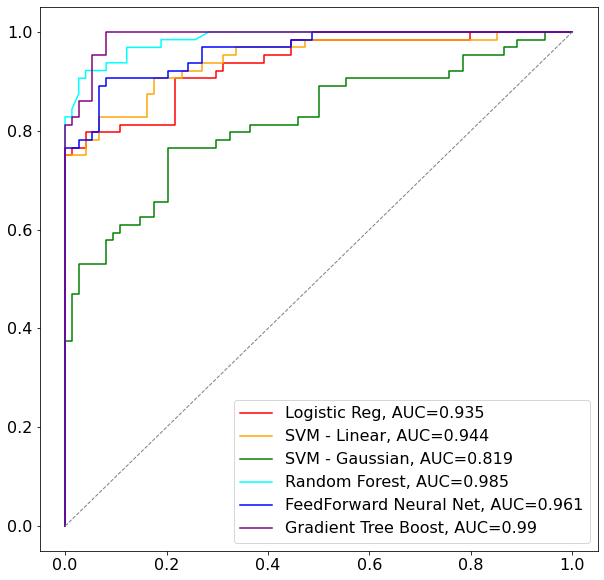

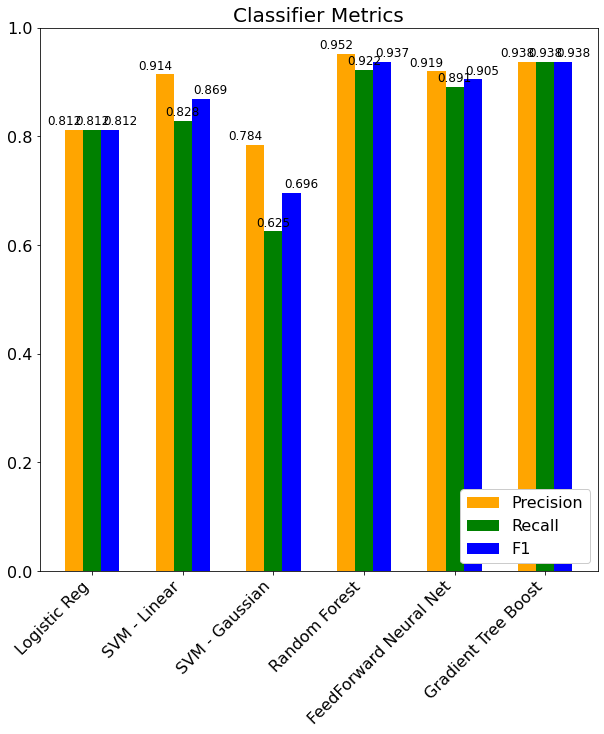

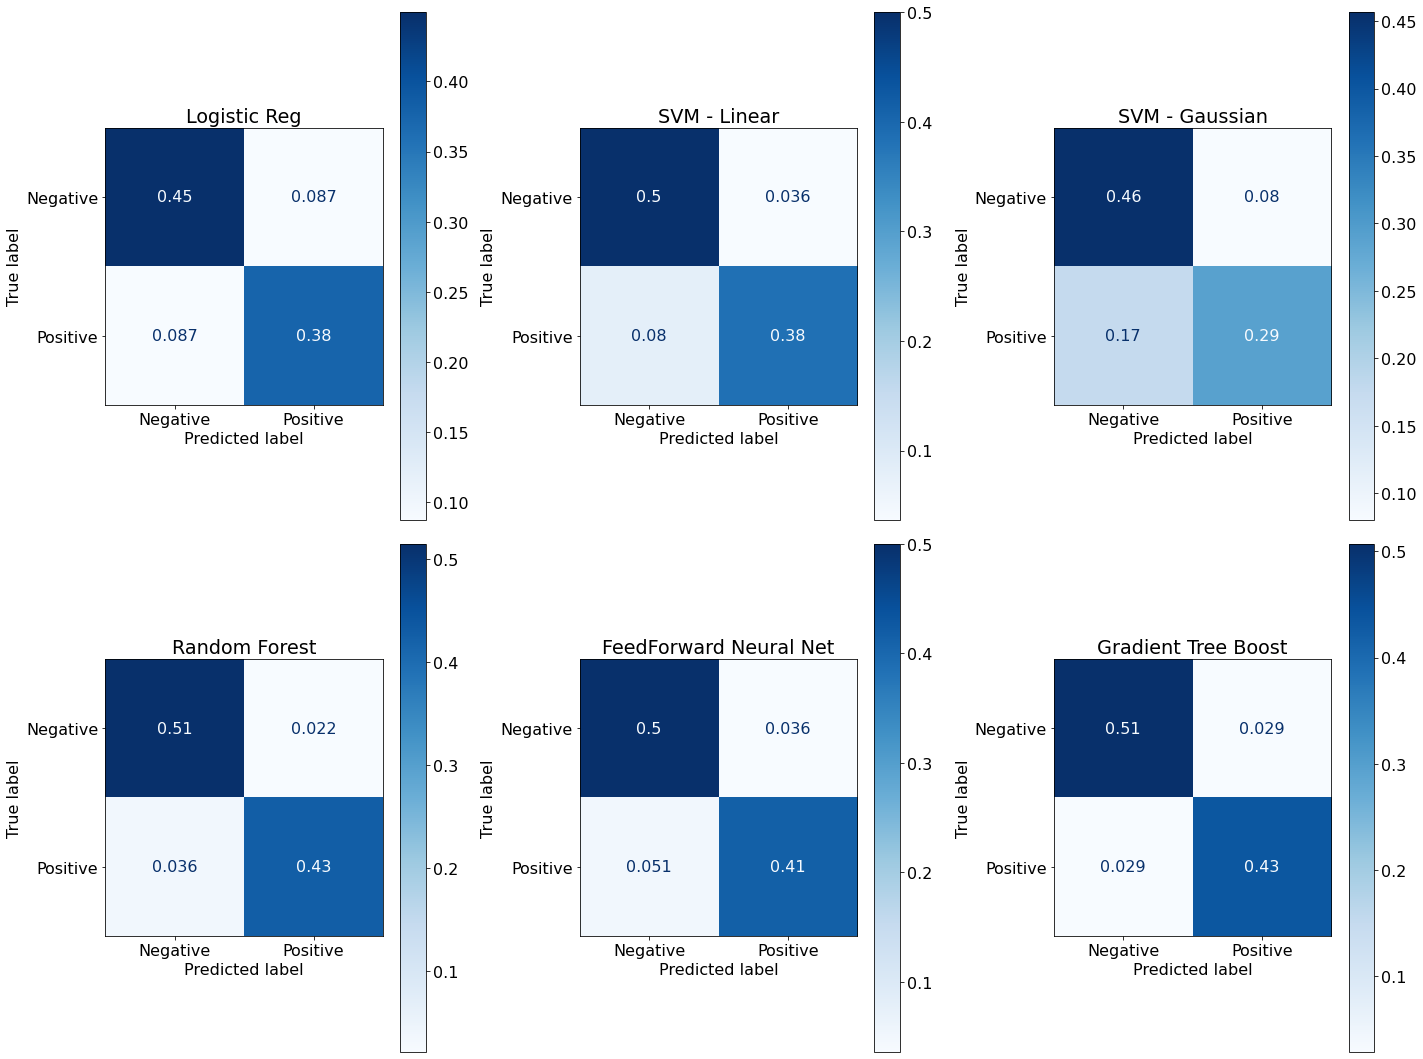

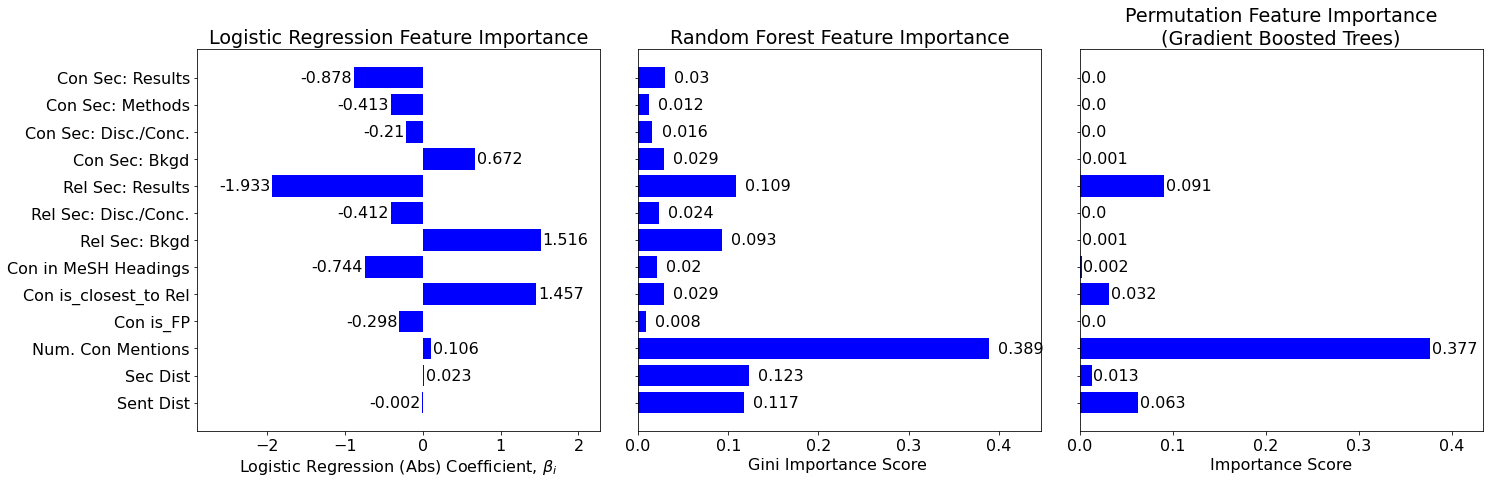

In [138]:
ppi_ds_jake_negs_features_df = pd.concat([jake_features_df[jake_features_df.annotation==False], ppi_ds_features_df])
